# Importing the modules

In [2]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score, recall_score, precision_score
from IPython.display import clear_output

from sklearn.feature_selection import SelectKBest, mutual_info_classif

import warnings
from sklearn.utils import shuffle
import os
import dill

# Importing the the environment with the saved variables

In [2]:
dill.load_session('Proteomic_517_ML_analysis_01_env.db')

# Importing the dataset

In [4]:
# Importing the Dataset
lisbon_coimbra_df = pd.read_excel('Lisbon_and_Coimbra_517_Proteomics.xlsx', sheet_name='517_Proteins')

# Removing the first row (that is a repetition of the number of peptides found)
lisbon_coimbra_df = lisbon_coimbra_df.iloc[1: , :]

# print(f'The dataset has: {lisb on_coimbra_df.shape[0]} examples and {lisbon_coimbra_df.shape[1]} features \n')

# Generating the y array
y = np.array([1 if i == 'Amyloid-Positive' else 2 for i in lisbon_coimbra_df['Class']]) # 1 -> A+ ; 2 -> A-
print(f'- The number of Amyloid-Positive patients is: {list(y).count(1)} \n- The number of Amyloid-Negative patients is: {list(y).count(2)} \n')

# Dropping the useless columns
lisbon_coimbra_df = lisbon_coimbra_df.drop(['Sample code', 'Class', 'Gender', 'Age'], axis=1)

# Generating the X array 
X = lisbon_coimbra_df.values
print(f'The final X matrix is made out of: {X.shape[0]} examples and {X.shape[1]} features')

- The number of Amyloid-Positive patients is: 67 
- The number of Amyloid-Negative patients is: 59 

The final X matrix is made out of: 126 examples and 517 features


In [13]:
# visualizing the first 10 rows of the dataframe
lisbon_coimbra_df[:10]

,ALBU_HUMAN,TRFE_HUMAN,TTHY_HUMAN,PTGDS_HUMAN,FBLN1_HUMAN,CO3_HUMAN,A2MG_HUMAN,FINC_HUMAN,CFAH_HUMAN,IGG1_HUMAN,...,SRPX_HUMAN,MDGA1_HUMAN,LV218_HUMAN,ACYP2_HUMAN,EGFLA_HUMAN,DSG2_HUMAN,CO6A2_HUMAN,LV223_HUMAN,MOES_HUMAN,CSPG4_HUMAN
1,0.356318,0.064232,0.015572,0.016359,0.004050,0.012248,0.004779,0.002982,0.002152,0.019001,...,0.000015,0.000067,0.000026,0.000028,0.000055,0.000042,0.000013,0.000043,7.468032e-06,0.000005
2,0.386206,0.047139,0.011901,0.012724,0.001745,0.018902,0.003778,0.001582,0.001820,0.039033,...,0.000036,0.000080,0.000034,0.000080,0.000057,0.000026,0.000016,0.000016,1.168286e-07,0.000010
3,0.487252,0.029375,0.019694,0.013325,0.002766,0.012882,0.003005,0.001655,0.001678,0.018865,...,0.000033,0.000031,0.000031,0.000078,0.000017,0.000038,0.000181,0.000005,2.735813e-06,0.000008
4,0.349113,0.071905,0.013097,0.016280,0.002784,0.018822,0.005564,0.002036,0.002687,0.032280,...,0.000064,0.000077,0.000046,0.000078,0.000007,0.000043,0.000025,0.000008,7.837693e-06,0.000011
5,0.326597,0.064845,0.018108,0.024601,0.002848,0.014416,0.004604,0.002868,0.001743,0.032797,...,0.000040,0.000077,0.000076,0.000028,0.000013,0.000049,0.000031,0.000060,1.470958e-05,0.000004
6,0.262566,0.099774,0.019711,0.028523,0.003217,0.015407,0.007085,0.003849,0.002680,0.036365,...,0.000032,0.000084,0.000079,0.000032,0.000027,0.000028,0.000096,0.000064,1.724970e-05,0.000011
7,0.282660,0.062658,0.018951,0.020166,0.002687,0.022950,0.006127,0.002703,0.002508,0.034719,...,0.000047,0.000086,0.000085,0.000139,0.000044,0.000064,0.000103,0.000035,7.621739e-06,0.000007
8,0.289263,0.050341,0.022560,0.020578,0.004679,0.017594,0.006193,0.004181,0.003026,0.026875,...,0.000039,0.000020,0.000056,0.000022,0.000060,0.000034,0.000021,0.000020,2.343463e-05,0.000006
9,0.479895,0.031451,0.012957,0.015482,0.002958,0.012776,0.004636,0.002497,0.002061,0.036856,...,0.000018,0.000070,0.000066,0.000028,0.000010,0.000029,0.000005,0.000009,2.406141e-05,0.000003
10,0.436040,0.053369,0.017765,0.016478,0.002887,0.010877,0.004307,0.002815,0.002252,0.030383,...,0.000031,0.000008,0.000028,0.000022,0.000057,0.000035,0.000007,0.000012,1.562968e-06,0.000004


# Generating the models that will be tested  

For the analysis we will use:
- Support Vector Machine (SVM)
- Naive Bayes (NB)
- k-Nearest Neighbors (kNN)
- Decision Tree (DT)
- Random Forest (RF)
- XGBoost (XGB)

The hyperparameter for the SVM and kNN models have been found with the grid-search

In [3]:
# Generating the models
svm_model = SVC(kernel='rbf', C=100, gamma=1) # Decrease the the C = 10/1/0.1
nb_model = GaussianNB()
knn_model = KNeighborsClassifier(n_neighbors=6) # Remove this
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier(n_estimators=100, n_jobs=-1)
xgb_model = xgb.XGBClassifier(n_estimators=100, eval_metric='logloss')
# lr_model = LogisticRegression()

# Saving the model in a dictionary
models_dict = {'SVM': svm_model, 
                'NB': nb_model,
                # 'kNN': knn_model,
                'DT': dt_model,
                'RF': rf_model,
                'XGB': xgb_model}

# Cross-Validating the models

### **Defining the functions that will be used for the Cross-Validation with and without the use of SMOTE**

In [6]:
def cross_validate_balancing(estimator, X, y, balance = SMOTE(), folds=10):

    cv = StratifiedKFold(n_splits = folds, shuffle = True) 
    scores = {\
            'auc':[], \
            'accuracy': [], \
            'f1': [], \
            'precision': [], \
            'recall': []}
    
    for train_idx, test_idx in cv.split(X,y): 
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        if balance != 'None':
            X_train, y_train = balance.fit_resample(X_train, y_train)

        estimator.fit(X_train, y_train)
        y_predicted = estimator.predict(X_test)

        scores['auc'].append(roc_auc_score(y_test, y_predicted))
        scores['accuracy'].append(accuracy_score(y_test, y_predicted))
        scores['f1'].append(f1_score(y_test, y_predicted))
        scores['precision'].append(precision_score(y_test, y_predicted))
        scores['recall'].append(recall_score(y_test, y_predicted))

    return scores

In [7]:
def cv_iteration(model, X, y, iterations=10, folds=10):
    
    # Defining the final dictionary that will contain the scores
    iter_result_no_smote = {}
    iter_result_smote = {}

    for _ in range(iterations):

        if _ % 2 == 0:
            # clear_output(wait=True)
            print(f'{(_/iterations)*100}%', end=' -> ')

        result_no_smote = cross_validate_balancing(model, X, y, balance='None', folds=folds) # Calling the CV function withOUT SMOTE
        result_smote = cross_validate_balancing(model, X, y, folds=folds) # Calling the CV function with SMOTE
        result_no_smote = {k: np.mean(v) for k, v in result_no_smote.items()}
        result_smote = {k: np.mean(v) for k, v in result_smote.items()}

        # Filling the dictionary with the resuts obtained WITHOUT applying SMOTE
        for k, v in result_no_smote.items():
            if k in iter_result_no_smote.keys():
                iter_result_no_smote[k].append(v)
            else:
                iter_result_no_smote[k] = [v]

        # Filing the dictionary with the results obtained by applying the SMOTE method
        for k, v in result_smote.items():
            if k in iter_result_smote.keys():
                iter_result_smote[k].append(v)
            else:
                iter_result_smote[k] = [v]
    
    # Computing the standard deviation
    sd_dict_no_smote, sd_dict_smote = {}, {}
    # No SMOTE
    for k, v in iter_result_no_smote.items():
        sd_dict_no_smote[k] = np.std(v)  
    # With SMOTE
    for k, v in iter_result_smote.items():
        sd_dict_smote[k] = np.std(v)
                
    iter_result_no_smote = {k: np.mean(v) for k, v in iter_result_no_smote.items()}
    iter_result_smote = {k: np.mean(v) for k, v in iter_result_smote.items()}

    return iter_result_no_smote, iter_result_smote, sd_dict_no_smote, sd_dict_smote

In [8]:
def cross_validate(models_dict, X, y, iterations=10, folds=10):

    results_no_smote_df = pd.DataFrame()
    results_smote_df = pd.DataFrame()

    for key, model in models_dict.items():

        print('\n', key, '--> Executing...') 
        
        # Getting the results - Iterating n times the CV procedure
        model_result_no_smote, model_result_smote, sd_dict_no_smote, sd_dict_smote = cv_iteration(model, X, y, iterations=iterations, folds=folds)

        # Adding the SD
        # No SMOTE
        for k, v in model_result_no_smote.items():
            model_result_no_smote[k] = str(round(v, 3)) + ' +/- ' + str(round(sd_dict_no_smote[k], 2))
        # With SMOTE
        for k, v in model_result_smote.items():
            model_result_smote[k] = str(round(v, 3)) + ' +/- ' + str(round(sd_dict_smote[k], 2))

        # Preparing the result dicts to be appended to the final DF 
        new_row_no_smote = pd.Series(data=model_result_no_smote, name=key)
        new_row_smote = pd.Series(data=model_result_smote, name=key)

        # Append the results to the final DataFrame 
        results_no_smote_df = results_no_smote_df.append(new_row_no_smote, ignore_index=False)
        results_smote_df = results_smote_df.append(new_row_smote, ignore_index=False)

    print('Done')

    # Arranging the order of the columns
    cols = list(results_no_smote_df.columns)
    acc, auc = cols.index('accuracy'), cols.index('auc')
    cols[auc], cols[acc] = cols[acc], cols[auc]

    results_no_smote_df = results_no_smote_df[cols]
    results_smote_df = results_smote_df[cols]

    # Sorting the models by the results of the AUC metric
    results_no_smote_df = results_no_smote_df.sort_values(['auc'], ascending=False)
    results_smote_df = results_smote_df.sort_values(['auc'], ascending=False)

    return results_no_smote_df, results_smote_df

### **Using these function I can Cross-Validate the models**

In [9]:
warnings.filterwarnings('ignore')

# Cross-Validating the models
lisbon_coimbra_no_smote_df, lisbon_coimbra_smote_df = cross_validate(models_dict, X, y, iterations=10, folds=10)


 SVM --> Executing...
0.0% -> 20.0% -> 40.0% -> 60.0% -> 80.0% -> 
 NB --> Executing...
0.0% -> 20.0% -> 40.0% -> 60.0% -> 80.0% -> 
 kNN --> Executing...
0.0% -> 20.0% -> 40.0% -> 60.0% -> 80.0% -> 
 DT --> Executing...
0.0% -> 20.0% -> 40.0% -> 60.0% -> 80.0% -> 
 RF --> Executing...
0.0% -> 20.0% -> 40.0% -> 60.0% -> 80.0% -> 
 XGB --> Executing...
0.0% -> 20.0% -> 40.0% -> 60.0% -> 80.0% -> Done


In [3]:
# Showing the results
print('The ML model results obtained without the use of SMOTE are:')
lisbon_coimbra_no_smote_df

The ML model results obtained without the use of SMOTE are:


,auc,accuracy,f1,precision,recall
RF,0.917 +/- 0.01,0.92 +/- 0.01,0.929 +/- 0.01,0.902 +/- 0.02,0.965 +/- 0.01
XGB,0.896 +/- 0.01,0.898 +/- 0.01,0.904 +/- 0.01,0.906 +/- 0.02,0.915 +/- 0.01
NB,0.801 +/- 0.02,0.799 +/- 0.02,0.798 +/- 0.02,0.854 +/- 0.03,0.776 +/- 0.03
DT,0.778 +/- 0.04,0.779 +/- 0.04,0.788 +/- 0.04,0.811 +/- 0.04,0.787 +/- 0.05
SVM,0.736 +/- 0.02,0.741 +/- 0.02,0.768 +/- 0.01,0.74 +/- 0.02,0.816 +/- 0.01
kNN,0.696 +/- 0.01,0.707 +/- 0.01,0.761 +/- 0.01,0.683 +/- 0.02,0.873 +/- 0.02


In [11]:
print('The ML model results obtained with the use of SMOTE are:')
lisbon_coimbra_smote_df

The ML model results obtained with the use of SMOTE are:


,auc,accuracy,f1,precision,recall
RF,0.92 +/- 0.01,0.921 +/- 0.01,0.929 +/- 0.01,0.907 +/- 0.02,0.961 +/- 0.01
XGB,0.896 +/- 0.01,0.897 +/- 0.01,0.903 +/- 0.01,0.908 +/- 0.01,0.911 +/- 0.02
NB,0.793 +/- 0.02,0.793 +/- 0.02,0.796 +/- 0.02,0.828 +/- 0.02,0.787 +/- 0.03
DT,0.763 +/- 0.02,0.764 +/- 0.02,0.778 +/- 0.02,0.788 +/- 0.03,0.786 +/- 0.03
SVM,0.753 +/- 0.01,0.754 +/- 0.01,0.755 +/- 0.02,0.776 +/- 0.02,0.756 +/- 0.02
kNN,0.677 +/- 0.03,0.683 +/- 0.04,0.719 +/- 0.03,0.678 +/- 0.03,0.785 +/- 0.05


# Feature Selection

#### *Defining the dictionaries that I will use to store the feature importance results of every ranking methods for each of the models*

In [12]:
feat_imp_svm, feat_imp_nb, feat_imp_knn, feat_imp_dt, feat_imp_rf, feat_imp_xgb, feat_imp_lr = {}, {}, {}, {}, {}, {}, {}

## **1. Univariate Selection**

The key objective of this analysis is to simply describe the data to find the patterns within the data.
This is done by looking into the mean, median, mode, dispersion, variance, reange, standard deviation, etc... 

In [18]:
# Apply the SelectKBest class to order all the best features
select_best_features = SelectKBest(mutual_info_classif, k='all') 
fit_selected = select_best_features.fit(X, y)

# Defining the new dataframe with the best feature inside
df_scores = pd.DataFrame(fit_selected.scores_)
df_columns = pd.DataFrame(lisbon_coimbra_df.columns)
# Concatenation of these two dataframes
feat_imp_univ_df = pd.concat([df_columns, df_scores], axis=1)
feat_imp_univ_df.columns = ['Prot_code', 'Score']

feat_imp_univ_df[:10]

feat_imp_univ_df_sorted = feat_imp_univ_df.sort_values(['Score'], ascending=False)

feat_imp_univ_df_sorted

,Prot_code,Score
166,FETUA_HUMAN,0.213672
293,FBLN2_HUMAN,0.212962
132,IBP7_HUMAN,0.211470
130,CFAI_HUMAN,0.206867
252,CD109_HUMAN,0.200493
...,...,...
400,FRS1L_HUMAN,0.000000
401,KV106_HUMAN,0.000000
108,PRIO_HUMAN,0.000000
105,SHPS1_HUMAN,0.000000


In [19]:
# Storig the feature and their position in a dictionary
feat_imp_univ = {}

for i, feat in enumerate(list(feat_imp_univ_df_sorted['Prot_code']), 1):
    feat_imp_univ[feat] = [i]

print(list(feat_imp_univ.items())[:3])

[('FETUA_HUMAN', [1]), ('FBLN2_HUMAN', [2]), ('IBP7_HUMAN', [3])]


## **2. Single Score**  

Creates classifiers considering only one protein and rank them based on the accuracy computed in a k-fold cross validation

### ***Defining the function that I will use***

In [15]:
def cv_one_feat(Dataset, model, y, iterations=10, folds=10):

    final_results_df = pd.DataFrame()

    length = len(Dataset.keys())

    for i, feat in enumerate(Dataset.keys()):

        result_iter = {}

        if i % 10 == 0:
            clear_output(wait=True)
            print(f'{(i/length)*100:.0f}%')

        # Generatin the X matrix with just one feature at the time
        X_list = [[x] for x in list(Dataset[feat])]
        X_one_feat = np.array([np.array(xi) for xi in X_list])

        for _ in range(iterations):
            results = cross_validate_balancing(model, X_one_feat, y, balance='None', folds=folds) # balance='None' -> If you don't want SMOTE
            results = {k: np.mean(v) for k, v in results.items()}
            # print(results)
            
            for key, value in results.items():
                if key in result_iter.keys():
                    result_iter[key].append(value)
                else:
                    result_iter[key] = [value]

        result_iter = {k: np.mean(v) for k, v in result_iter.items()}

        # Converting the dictionary in a panda Serie so that I can that append it to the final dataframe
        new_row = pd.Series(data=result_iter, name=feat)

        # Append the new_row to the final dataframe
        final_results_df = final_results_df.append(new_row, ignore_index=False)

    # Reordering the columns of the final_results_df
    cols = list(final_results_df.columns)
    acc, auc = cols.index('accuracy'), cols.index('auc')
    cols[auc], cols[acc] = cols[acc], cols[auc]

    final_results_df = final_results_df[cols]

    # Sorting the models by the results of the AUC metric
    final_results_df = final_results_df.sort_values(['auc'], ascending=False)
      
    return final_results_df

### **- Support Vector Machine - SVM**  

In [16]:
feat_imp_ss_svm = cv_one_feat(lisbon_coimbra_df, svm_model, y, iterations=10, folds=10)

99%


In [39]:
print('This are the ordered single score features that best predict the data with SVM')
feat_imp_ss_svm

This are the ordered single score features that best predict the data with SVM


,auc,accuracy,f1,precision,recall
ALBU_HUMAN,0.582286,0.601859,0.703916,0.583475,0.896905
TRFE_HUMAN,0.565286,0.566731,0.596065,0.600815,0.628571
TTHY_HUMAN,0.508667,0.539423,0.697521,0.536078,1.000000
SAP_HUMAN,0.500000,0.531410,0.693684,0.531410,1.000000
NDRG2_HUMAN,0.500000,0.531410,0.693684,0.531410,1.000000
...,...,...,...,...,...
A2GL_HUMAN,0.500000,0.531410,0.693684,0.531410,1.000000
FETUA_HUMAN,0.500000,0.531410,0.693684,0.531410,1.000000
NPC2_HUMAN,0.500000,0.531410,0.693684,0.531410,1.000000
DKK3_HUMAN,0.500000,0.531410,0.693684,0.531410,1.000000


In [18]:
# Storing the SVM results
for i, feat in enumerate(list(feat_imp_ss_svm.index), 1):
    # print(i, feat)
    if feat in feat_imp_svm.keys():
        feat_imp_svm[feat].append(i)
    else:
        feat_imp_svm[feat] = [i]

print(list(feat_imp_svm.items())[:3])

[('ALBU_HUMAN', [1]), ('TRFE_HUMAN', [2]), ('TTHY_HUMAN', [3])]


### **- Naive Bayes - NB**

In [19]:
feat_imp_ss_nb = cv_one_feat(lisbon_coimbra_df, nb_model, y, iterations=10, folds=10)

99%


In [40]:
print('This are the ordered single score features that best predict the data with NB')
feat_imp_ss_nb

This are the ordered single score features that best predict the data with NB


,auc,accuracy,f1,precision,recall
FETUA_HUMAN,0.794524,0.801667,0.827973,0.777943,0.895714
IBP7_HUMAN,0.789905,0.792179,0.809674,0.798239,0.842143
NBL1_HUMAN,0.740167,0.748013,0.778618,0.741378,0.843333
AACT_HUMAN,0.708571,0.713910,0.749196,0.705130,0.817143
CD109_HUMAN,0.703405,0.714103,0.765883,0.689681,0.875476
...,...,...,...,...,...
OPCM_HUMAN,0.437548,0.446538,0.510388,0.463332,0.604762
BIP_HUMAN,0.426667,0.434936,0.469362,0.411179,0.600000
CO4A2_HUMAN,0.424929,0.418654,0.342499,0.381281,0.372857
MFAP4_HUMAN,0.416810,0.402500,0.218660,0.279851,0.209286


In [21]:
# Storing the NB results
for i, feat in enumerate(list(feat_imp_ss_nb.index), 1):
    # print(i, feat)
    if feat in feat_imp_nb.keys():
        feat_imp_nb[feat].append(i)
    else:
        feat_imp_nb[feat] = [i]

print(list(feat_imp_nb.items())[:3])

[('FETUA_HUMAN', [1]), ('IBP7_HUMAN', [2]), ('NBL1_HUMAN', [3])]


### **- k-Nearest-Neighbors - kNN**

In [22]:
feat_imp_ss_knn = cv_one_feat(lisbon_coimbra_df, knn_model, y, iterations=10, folds=10)

99%


In [41]:
print('This are the ordered single score features that best predict the data with kNN')
feat_imp_ss_knn

This are the ordered single score features that best predict the data with kNN


,auc,accuracy,f1,precision,recall
FETUA_HUMAN,0.777548,0.786538,0.818553,0.756892,0.909762
IBP7_HUMAN,0.767524,0.771346,0.791002,0.785364,0.822381
CAH1_HUMAN,0.733143,0.739359,0.771026,0.727226,0.837619
COEA1_HUMAN,0.722667,0.734872,0.785499,0.697356,0.911667
CFAI_HUMAN,0.720214,0.724551,0.751869,0.723632,0.801429
...,...,...,...,...,...
CATL1_HUMAN,0.416452,0.434744,0.563583,0.473244,0.710238
CO5_HUMAN,0.410738,0.426987,0.552791,0.468417,0.683810
NRX3A_HUMAN,0.409571,0.425513,0.539879,0.464407,0.655476
A1AT_HUMAN,0.394024,0.408205,0.515359,0.445407,0.622381


In [24]:
# Storing the kNN results
for i, feat in enumerate(list(feat_imp_ss_knn.index), 1):
    # print(i, feat)
    if feat in feat_imp_knn.keys():
        feat_imp_knn[feat].append(i)
    else:
        feat_imp_knn[feat] = [i]

print(list(feat_imp_knn.items())[:3])

[('FETUA_HUMAN', [1]), ('IBP7_HUMAN', [2]), ('CAH1_HUMAN', [3])]


### **- Decitsion Tree - DT**

In [25]:
feat_imp_ss_dt = cv_one_feat(lisbon_coimbra_df, dt_model, y, iterations=10, folds=10)

99%


In [42]:
print('This are the ordered single score features that best predict the data with DT')
feat_imp_ss_dt

This are the ordered single score features that best predict the data with DT


,auc,accuracy,f1,precision,recall
FETUA_HUMAN,0.749381,0.750256,0.765455,0.777083,0.781429
CFAI_HUMAN,0.732357,0.734359,0.746932,0.764476,0.754048
FBLN2_HUMAN,0.728143,0.729295,0.739949,0.745784,0.754286
LV746_HUMAN,0.702857,0.707115,0.733197,0.717190,0.769048
NRX2A_HUMAN,0.695048,0.696538,0.710637,0.730938,0.718095
...,...,...,...,...,...
PRIO_HUMAN,0.391310,0.390577,0.398278,0.419464,0.397619
SPRL1_HUMAN,0.389048,0.390833,0.414623,0.418339,0.423095
1433Z_HUMAN,0.363714,0.367949,0.408291,0.396319,0.436429
CO2_HUMAN,0.361381,0.362500,0.373270,0.383290,0.378095


In [27]:
# Storing the DT results
for i, feat in enumerate(list(feat_imp_ss_dt.index), 1):
    # print(i, feat)
    if feat in feat_imp_dt.keys():
        feat_imp_dt[feat].append(i)
    else:
        feat_imp_dt[feat] = [i]

print(list(feat_imp_dt.items())[:3])

[('FETUA_HUMAN', [1]), ('CFAI_HUMAN', [2]), ('FBLN2_HUMAN', [3])]


### **- Random Forests - RF**

In [28]:
feat_imp_ss_rf = cv_one_feat(lisbon_coimbra_df, rf_model, y, iterations=10, folds=10)

99%


In [37]:
print('This are the ordered single score features that best predict the data with RF')
feat_imp_ss_rf

This are the ordered single score features that best predict the data with RF


,auc,accuracy,f1,precision,recall
FETUA_HUMAN,0.750952,0.752821,0.767077,0.774993,0.783571
CFAI_HUMAN,0.726167,0.726474,0.733840,0.759205,0.733333
FBLN2_HUMAN,0.723190,0.725897,0.741609,0.742661,0.759048
LV746_HUMAN,0.694262,0.697051,0.715419,0.708389,0.744524
NRX2A_HUMAN,0.680595,0.682500,0.694522,0.713163,0.699524
...,...,...,...,...,...
KCC2B_HUMAN,0.392310,0.390769,0.384023,0.402534,0.382619
SPRL1_HUMAN,0.376167,0.378590,0.386649,0.393478,0.393333
CO2_HUMAN,0.371643,0.371987,0.386531,0.392740,0.394286
PTPRG_HUMAN,0.365571,0.369103,0.407468,0.396653,0.433810


In [30]:
# Storing the RF results
for i, feat in enumerate(list(feat_imp_ss_rf.index), 1):
    # print(i, feat)
    if feat in feat_imp_rf.keys():
        feat_imp_rf[feat].append(i)
    else:
        feat_imp_rf[feat] = [i]

print(list(feat_imp_rf.items())[:3])

[('FETUA_HUMAN', [1]), ('CFAI_HUMAN', [2]), ('FBLN2_HUMAN', [3])]


### **- XGBoost - XGB**

In [31]:
feat_imp_ss_xgb = cv_one_feat(lisbon_coimbra_df, xgb_model, y, iterations=10, folds=10)

99%


In [38]:
print('This are the ordered single score features that best predict the data with XGB')
feat_imp_ss_xgb

This are the ordered single score features that best predict the data with XGB


,auc,accuracy,f1,precision,recall
FETUA_HUMAN,0.746238,0.749103,0.763876,0.765234,0.778810
FBLN2_HUMAN,0.744214,0.744936,0.756879,0.768734,0.763095
CFAI_HUMAN,0.740571,0.743462,0.754570,0.772844,0.762143
LV746_HUMAN,0.707833,0.709103,0.724562,0.730304,0.736667
CAH1_HUMAN,0.703690,0.702564,0.708713,0.745286,0.697381
...,...,...,...,...,...
CO2_HUMAN,0.388286,0.390000,0.407410,0.415873,0.413571
CSTN3_HUMAN,0.385286,0.385192,0.380691,0.404819,0.375238
APLP2_HUMAN,0.384595,0.385385,0.395425,0.408355,0.397857
1433Z_HUMAN,0.379214,0.383526,0.417817,0.409199,0.443095


In [33]:
# Storing the XGB results
for i, feat in enumerate(list(feat_imp_ss_xgb.index), 1):
    # print(i, feat)
    if feat in feat_imp_xgb.keys():
        feat_imp_xgb[feat].append(i)
    else:
        feat_imp_xgb[feat] = [i]

print(list(feat_imp_xgb.items())[:3])

[('FETUA_HUMAN', [1]), ('FBLN2_HUMAN', [2]), ('CFAI_HUMAN', [3])]


In [34]:
feat_imp_ss_lr = cv_one_feat(lisbon_coimbra_df, lr_model, y, iterations=10, folds=10)

99%


In [35]:
print('This are the ordered single score features that best predict the data with LR')
feat_imp_ss_lr[:10]

This are the ordered single score features that best predict the data with LR


,auc,accuracy,f1,precision,recall
ALBU_HUMAN,0.5,0.53141,0.693684,0.53141,1.0
LAMP2_HUMAN,0.5,0.53141,0.693684,0.53141,1.0
RS27A_HUMAN,0.5,0.53141,0.693684,0.53141,1.0
NDRG2_HUMAN,0.5,0.53141,0.693684,0.53141,1.0
SEPP1_HUMAN,0.5,0.53141,0.693684,0.53141,1.0
VCAM1_HUMAN,0.5,0.53141,0.693684,0.53141,1.0
C1RL_HUMAN,0.5,0.53141,0.693684,0.53141,1.0
RNAS4_HUMAN,0.5,0.53141,0.693684,0.53141,1.0
MA1A1_HUMAN,0.5,0.53141,0.693684,0.53141,1.0
MRC2_HUMAN,0.5,0.53141,0.693684,0.53141,1.0


In [36]:
# Storing the LR results
for i, feat in enumerate(list(feat_imp_ss_lr.index), 1):
    # print(i, feat)
    if feat in feat_imp_lr.keys():
        feat_imp_lr[feat].append(i)
    else:
        feat_imp_lr[feat] = [i]

print(list(feat_imp_lr.items())[:3])

[('ALBU_HUMAN', [1]), ('LAMP2_HUMAN', [2]), ('RS27A_HUMAN', [3])]


## **3. Attributes' Weights**  

Train classifiers and rank the features based on default feature weighting method. The importance of each feature is obtained either through a *coef_attribute* or throuugh *feature_importance_attribute*.

### **- Support Vector Machine - SVM** !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

#### *Defining the function that I will use for this task*

In [6]:
def svm_feat_importance(model, Dataset, X, y, iterations=500):

    score_feature_dict_svm = {}

    # Iterative method for feature importance:
    for _ in range(iterations):

        if _ % 50 == 0:
            clear_output(wait=True)
            print(f'{(_/iterations)*100}%')

        # Generating the train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

        # Fitting the model
        model.fit(X_train, y_train)
        
        imps = permutation_importance(model, X_test, y_test)

        # Storing the important features
        feat_importance_svm = imps['importances_mean']

        # Adding the importance score of the features to the dictionary
        for idx, score in enumerate(feat_importance_svm):
            if Dataset.keys()[idx] in score_feature_dict_svm.keys():
                score_feature_dict_svm[Dataset.keys()[idx]].append(score)
            else:
                score_feature_dict_svm[Dataset.keys()[idx]] = [score]

    score_feature_dict_svm = {k: np.mean(v) for k, v in score_feature_dict_svm.items()}

    features_svm_sorted = dict(sorted(score_feature_dict_svm.items(), key=lambda x: x[1], reverse=True))

    feature_importance_name_svm = list(features_svm_sorted.keys())

    return features_svm_sorted, feature_importance_name_svm

In [38]:
n_iter = 100

feat_imp_score_aw_svm, feat_imp_aw_svm = svm_feat_importance(svm_model, lisbon_coimbra_df, X, y, iterations=n_iter)

50.0%


In [39]:
# Storing the results
for i, feat in enumerate(feat_imp_aw_svm, 1):
    if feat in feat_imp_svm.keys():
        feat_imp_svm[feat].append(i)
    else:
        feat_imp_svm[feat] = [i]

print(list(feat_imp_svm.items())[:3])

[('ALBU_HUMAN', [1, 2]), ('TRFE_HUMAN', [2, 1]), ('TTHY_HUMAN', [3, 3])]


#### *Plotting the results:*

<BarContainer object of 21 artists>

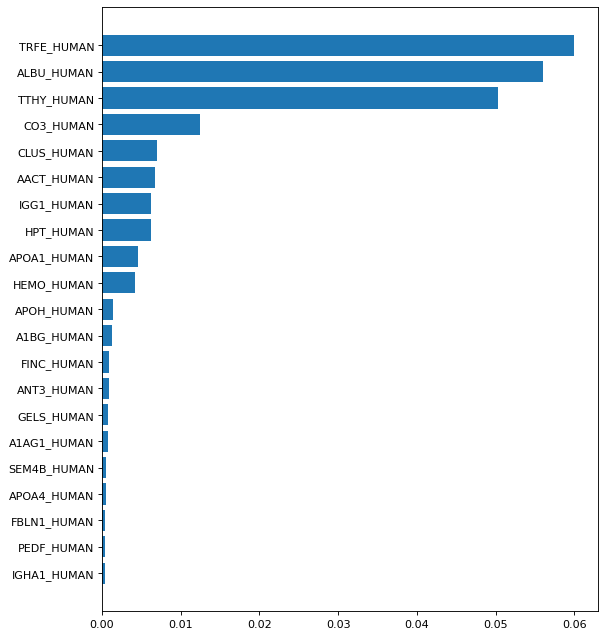

In [40]:
# Plotting the first 50 most iportant features for the SVM model
figure(figsize=(8, 10), dpi=80)

plt.barh(list(feat_imp_score_aw_svm.keys())[20::-1], list(feat_imp_score_aw_svm.values())[20::-1])

### **- Naive Bayes - NB**

#### *Defining the function the I will use for this task*

In [7]:
def nb_feat_importance(model, Dataset, X, y, iterations=500):

    score_feature_dict_nb = {}

    # Iterative method for feature importance:
    for _ in range(iterations):

        if _ % 50 == 0:
            clear_output(wait=True)
            print(f'{(_/iterations)*100}%')

        # Generating the train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

        # Fitting the model
        model.fit(X_train, y_train)
        
        imps = permutation_importance(model, X_test, y_test)

        # Storing the important features
        feat_importance_nb = imps['importances_mean']

        # Adding the importance score of the features to the dictionary
        for idx, score in enumerate(feat_importance_nb):
            if Dataset.keys()[idx] in score_feature_dict_nb.keys():
                score_feature_dict_nb[Dataset.keys()[idx]].append(score)
            else:
                score_feature_dict_nb[Dataset.keys()[idx]] = [score]

    score_feature_dict_nb = {k: np.mean(v) for k, v in score_feature_dict_nb.items()}

    features_nb_sorted = dict(sorted(score_feature_dict_nb.items(), key=lambda x: x[1], reverse=True))

    feature_importance_name_nb = list(features_nb_sorted.keys())

    return(features_nb_sorted, feature_importance_name_nb)

In [42]:
n_iter = 100

feat_imp_score_aw_nb, feat_imp_aw_nb = nb_feat_importance(nb_model, lisbon_coimbra_df, X, y, iterations=n_iter)

50.0%


In [43]:
# Storing the results
for i, feat in enumerate(feat_imp_aw_nb, 1):
    if feat in feat_imp_nb.keys():
        feat_imp_nb[feat].append(i)
    else:
        feat_imp_nb[feat] = [i]

print(list(feat_imp_nb.items())[:3])

[('FETUA_HUMAN', [1, 25]), ('IBP7_HUMAN', [2, 9]), ('NBL1_HUMAN', [3, 45])]


#### *Plotting the results*

<BarContainer object of 21 artists>

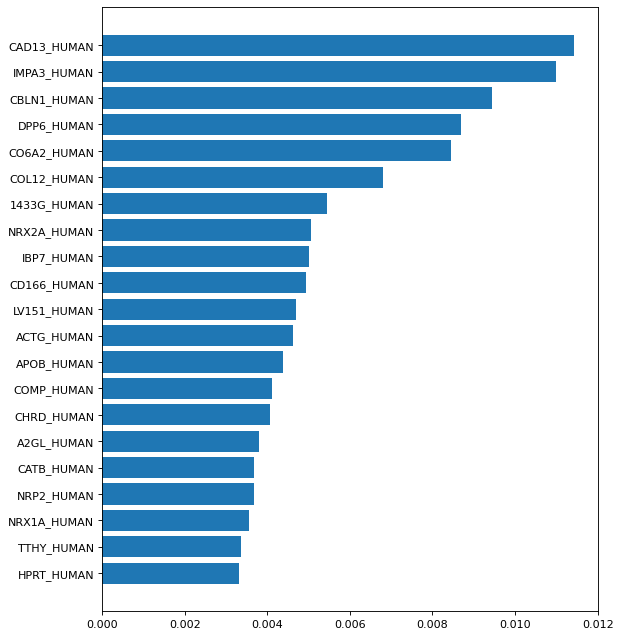

In [44]:
# Plotting the first 20 most iportant features for the NB model
figure(figsize=(8, 10), dpi=80)

plt.barh(list(feat_imp_score_aw_nb.keys())[20::-1], list(feat_imp_score_aw_nb.values())[20::-1])

### **- k Nearest Neighbors - kNN**

It's not possible to extract *feature_importance_* from the kNN classifier

### **- Decision Tree - DT**

#### *Defining the function that I will use for this task*

In [8]:
def dt_feat_importance(model, Dataset, X, y, iterations=500):

    score_feature_dict_rf = {}

    for i in range(iterations):

        if i % 10 == 0:
            clear_output(wait=True)
            print(f'{(i/iterations)*100}%')

        # Fitting the model
        model.fit(X, y)

        # Extracting the important features
        feature_importance_rf = model.feature_importances_

        for i, score in enumerate(feature_importance_rf):
            if Dataset.keys()[i] in score_feature_dict_rf.keys():
                score_feature_dict_rf[Dataset.keys()[i]].append(score)
            else:
                score_feature_dict_rf[Dataset.keys()[i]] = [score]

    # Computing the mean of the sores from the different iterations for each of the features
    score_feature_dict_rf = {k: np.mean(v) for k, v in score_feature_dict_rf.items()}

    features_rf_sorted = dict(sorted(score_feature_dict_rf.items(), key=lambda x: x[1], reverse=True))

    feature_importance_name_rf = list(features_rf_sorted.keys())

    return(features_rf_sorted, feature_importance_name_rf)

In [46]:
# Number of iterations
n_iter = 100

feat_imp_score_aw_dt, feat_imp_aw_dt = dt_feat_importance(dt_model, lisbon_coimbra_df, X, y, iterations=n_iter)

90.0%


In [47]:
# Storing the results
for i, feat in enumerate(feat_imp_aw_dt, 1):
    if feat in feat_imp_dt.keys():
        feat_imp_dt[feat].append(i)
    else:
        feat_imp_dt[feat] = [i]

print(list(feat_imp_dt.items())[:3])

[('FETUA_HUMAN', [1, 1]), ('CFAI_HUMAN', [2, 226]), ('FBLN2_HUMAN', [3, 352])]


#### *Plotting the results*

<BarContainer object of 21 artists>

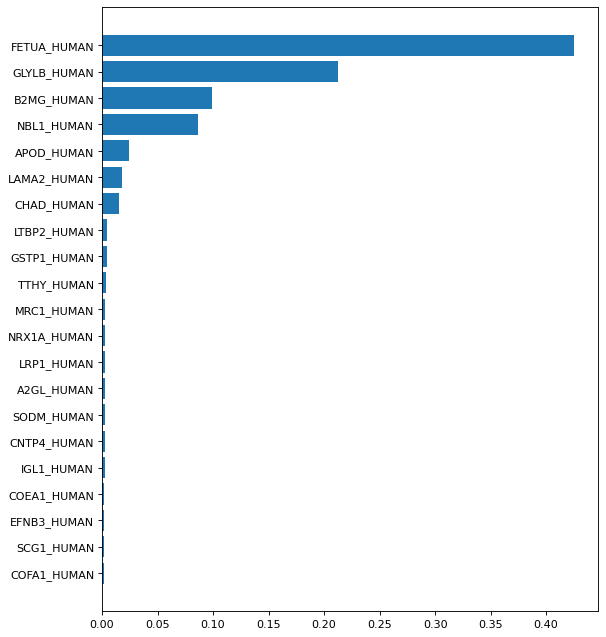

In [48]:
# Plotting the first 20 most iportant features for the DT model
figure(figsize=(8, 10), dpi=80)

plt.barh(list(feat_imp_score_aw_dt.keys())[20::-1], list(feat_imp_score_aw_dt.values())[20::-1])

### **- Random Forest - RF**

#### *Defining the function that I will use for this task*

In [9]:
def rf_feat_importance(model, Dataset, X, y, iterations=500):

    score_feature_dict_rf = {}

    for i in range(iterations):

        if i % 10 == 0:
            clear_output(wait=True)
            print(f'{(i/iterations)*100}%')

        # Fitting the model
        model.fit(X, y)

        # Extracting the important features
        feature_importance_rf = model.feature_importances_

        for i, score in enumerate(feature_importance_rf):
            if Dataset.keys()[i] in score_feature_dict_rf.keys():
                score_feature_dict_rf[Dataset.keys()[i]].append(score)
            else:
                score_feature_dict_rf[Dataset.keys()[i]] = [score]

    # Computing the mean of the sores from the different iterations for each of the features
    score_feature_dict_rf = {k: np.mean(v) for k, v in score_feature_dict_rf.items()}

    features_rf_sorted = dict(sorted(score_feature_dict_rf.items(), key=lambda x: x[1], reverse=True))

    feature_importance_name_rf = list(features_rf_sorted.keys())

    return(features_rf_sorted, feature_importance_name_rf)

In [50]:
# Number of iterations
n_iter = 100

feat_imp_score_aw_rf, feat_imp_aw_rf = rf_feat_importance(rf_model, lisbon_coimbra_df, X, y, iterations=n_iter)

90.0%


In [51]:
# Storing the results
for i, feat in enumerate(feat_imp_aw_rf, 1):
    if feat in feat_imp_rf.keys():
        feat_imp_rf[feat].append(i)
    else:
        feat_imp_rf[feat] = [i]

print(list(feat_imp_rf.items())[:3])

[('FETUA_HUMAN', [1, 1]), ('CFAI_HUMAN', [2, 4]), ('FBLN2_HUMAN', [3, 7])]


#### *Plotting the results*

<BarContainer object of 21 artists>

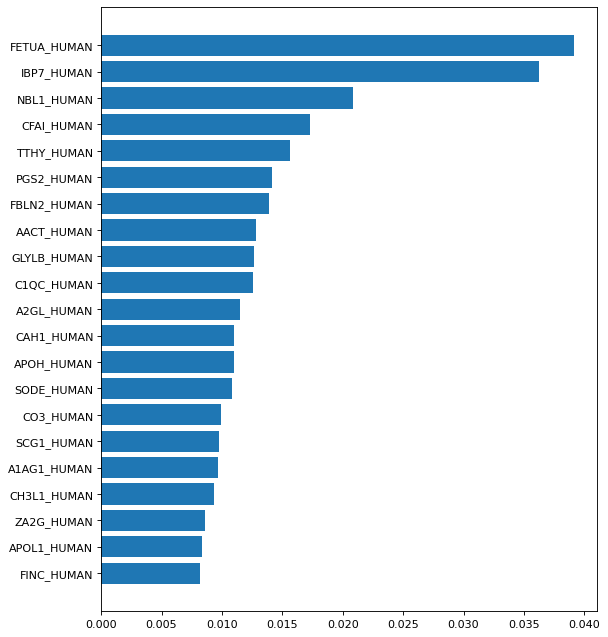

In [52]:
# Plotting the first 20 most iportant features for the DT model
figure(figsize=(8, 10), dpi=80)

plt.barh(list(feat_imp_score_aw_rf.keys())[20::-1], list(feat_imp_score_aw_rf.values())[20::-1])

### **- XGBoost - XGB**

#### *Defining the functiona that I will use for this task*

In [10]:
def xgb_feat_importance(model, Dataset, X, y, iterations=500):

    score_feature_dict_rf = {}

    for i in range(iterations):

        if i % 10 == 0:
            clear_output(wait=True)
            print(f'{(i/iterations)*100}%')

        # Fitting the model
        model.fit(X, y)

        # Extracting the important features
        feature_importance_rf = model.feature_importances_

        for i, score in enumerate(feature_importance_rf):
            if Dataset.keys()[i] in score_feature_dict_rf.keys():
                score_feature_dict_rf[Dataset.keys()[i]].append(score)
            else:
                score_feature_dict_rf[Dataset.keys()[i]] = [score]

    # Computing the mean of the sores from the different iterations for each of the features
    score_feature_dict_rf = {k: np.mean(v) for k, v in score_feature_dict_rf.items()}

    features_rf_sorted = dict(sorted(score_feature_dict_rf.items(), key=lambda x: x[1], reverse=True))

    feature_importance_name_rf = list(features_rf_sorted.keys())

    return(features_rf_sorted, feature_importance_name_rf)

In [54]:
# Number of iterations
n_iter = 100

feat_imp_score_aw_xgb, feat_imp_aw_xgb = xgb_feat_importance(xgb_model, lisbon_coimbra_df, X, y, iterations=n_iter)

90.0%


In [55]:
# Storing the results
for i, feat in enumerate(feat_imp_aw_xgb, 1):
    if feat in feat_imp_xgb.keys():
        feat_imp_xgb[feat].append(i)
    else:
        feat_imp_xgb[feat] = [i]

print(list(feat_imp_xgb.items())[:3])

[('FETUA_HUMAN', [1, 3]), ('FBLN2_HUMAN', [2, 308]), ('CFAI_HUMAN', [3, 27])]


#### *Plotting the results*

<BarContainer object of 21 artists>

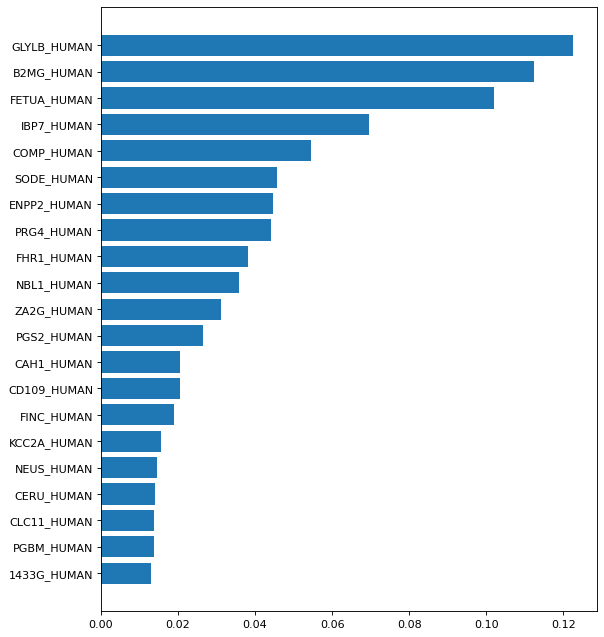

In [58]:
# Plotting the first 20 most iportant features for the DT model
figure(figsize=(8, 10), dpi=80)

plt.barh(list(feat_imp_score_aw_xgb.keys())[20::-1], list(feat_imp_score_aw_xgb.values())[20::-1])

## **4. Decrease of Accuracy**  

Computes the k-fold cross validation accuracy using all the features, than, remove one feature at a time and recompute the accuracy. The bigger is the difference from the base accuracy and the accuracy after removing a feature, the more relevant is the feature.

### ***Defining the functions that I will use***

In [11]:
def cross_validate_balancing_1(estimator, X, y, balance = SMOTE(), folds=10):

    cv = StratifiedKFold(n_splits = folds, shuffle = True) 
    scores = {\
            'auc':[], \
            'accuracy': [], \
            'f1': [], \
            'precision': [], \
            'recall': []}
    
    for train_idx, test_idx in cv.split(X,y): 
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        if balance != 'None':
            X_train, y_train = balance.fit_resample(X_train, y_train)

        estimator.fit(X_train, y_train)
        y_predicted = estimator.predict(X_test)

        scores['auc'].append(roc_auc_score(y_test, y_predicted))
        scores['accuracy'].append(accuracy_score(y_test, y_predicted))
        scores['f1'].append(f1_score(y_test, y_predicted))
        scores['precision'].append(precision_score(y_test, y_predicted))
        scores['recall'].append(recall_score(y_test, y_predicted))

    return scores

In [12]:
def cv_iteration_1(model, X, y, iterations=10, folds=10):
    
    # Defining the final dictionary that will contain the scores
    iter_result_no_smote = {}
    
    for _ in range(iterations):
        
        result_no_smote = cross_validate_balancing_1(model, X, y, balance='None', folds=folds) # Calling the CV function withOUT SMOTE
        result_no_smote = {k: np.mean(v) for k, v in result_no_smote.items()}

        # Filling the dictionary with the resuts obtained WITHOUT applying SMOTE
        for k, v in result_no_smote.items():
            if k in iter_result_no_smote.keys():
                iter_result_no_smote[k].append(v)
            else:
                iter_result_no_smote[k] = [v]
                
    iter_result_no_smote = {k: np.mean(v) for k, v in iter_result_no_smote.items()}

    return iter_result_no_smote

In [13]:
def rec_feat_add(dataset, model, all_feat_auc, iterations=10, folds=10):

    feat_list = list(dataset.columns)

    dataset_one_feat = dataset

    feat_imp_score_rfa = {}

    for i, feat in enumerate(feat_list):

        print(f'{i/len(feat_list) * 100:.0f} %')
        clear_output(wait=True)

        # Dropping the feature
        dataset_one_feat = dataset_one_feat.drop(feat, axis=1)
        X_one_feat_less = dataset_one_feat.values

        # Cross validate the model 
        result_cv = cv_iteration_1(model, X_one_feat_less, y, iterations=iterations, folds=folds)
        
        # Computing the score of the feature
        score = all_feat_auc - result_cv['auc']

        feat_imp_score_rfa[feat] = score

        # Re-adding the feature dropped
        dataset_one_feat = dataset

    feat_imp_score_rfa = dict(sorted(feat_imp_score_rfa.items(), key=lambda x: x[1], reverse=True))

    feat_imp_score_rfa_df = pd.DataFrame(list(feat_imp_score_rfa.items()), columns=['prot_code', 'score'])

    return feat_imp_score_rfa_df

### **- Support Vector Machine - SVM**

In [14]:
# Retriving the score that the model gave with all the features
all_feat_auc_svm = float(lisbon_coimbra_no_smote_df.loc['SVM', 'auc'].split(' ')[0])

# Recursive Feature Addition 
feat_imp_score_da_svm = rec_feat_add(lisbon_coimbra_df, svm_model, all_feat_auc_svm, iterations=10, folds=10)

100 %


In [78]:
# Printing the 20 best features from SVM
feat_imp_score_da_svm

,prot_code,score
0,TTHY_HUMAN,0.065881
1,TRFE_HUMAN,0.039881
2,CO3_HUMAN,0.011214
3,LAMA2_HUMAN,0.007881
4,CBLN1_HUMAN,0.005405
...,...,...
512,LAMB2_HUMAN,-0.018119
513,CO4A2_HUMAN,-0.018952
514,MYDGF_HUMAN,-0.019357
515,VTNC_HUMAN,-0.019452


In [64]:
# Storing the ordered features
for i, feat in enumerate(list(feat_imp_score_da_svm['prot_code']), 1):
    if feat in feat_imp_svm.keys():
            feat_imp_svm[feat].append(i)
    else:
        feat_imp_svm[feat] = [i]

print(list(feat_imp_svm.items())[:3])

[('ALBU_HUMAN', [1, 2, 490]), ('TRFE_HUMAN', [2, 1, 2]), ('TTHY_HUMAN', [3, 3, 1])]


### **- Naive Bayes - NB**

In [65]:
# Retriving the score that the model gave with all the features
all_feat_auc_nb = float(lisbon_coimbra_no_smote_df.loc['NB', 'auc'].split(' ')[0])

# Recursive Feature Addition 
feat_imp_score_da_nb = rec_feat_add(lisbon_coimbra_df, nb_model, all_feat_auc_nb, iterations=10, folds=10)

100 %


In [79]:
# Printing the 20 best features from NB
feat_imp_score_da_nb

,prot_code,score
0,CBLN1_HUMAN,0.028476
1,CD048_HUMAN,0.023500
2,LV327_HUMAN,0.022500
3,TIMP1_HUMAN,0.022500
4,CAD13_HUMAN,0.022381
...,...,...
512,SCG1_HUMAN,-0.006357
513,CSF1R_HUMAN,-0.006405
514,CIP4_HUMAN,-0.006667
515,LAMB1_HUMAN,-0.006667


In [67]:
# Storing the ordered features
for i, feat in enumerate(list(feat_imp_score_da_nb['prot_code']), 1):
    if feat in feat_imp_nb.keys():
        feat_imp_nb[feat].append(i)
    else:
        feat_imp_nb[feat] = [i]

print(list(feat_imp_nb.items())[:3])

[('FETUA_HUMAN', [1, 25, 356]), ('IBP7_HUMAN', [2, 9, 76]), ('NBL1_HUMAN', [3, 45, 222])]


### **- k Nearest Neighbors - kNN**

In [68]:
# Retriving the score that the model gave with all the features
all_feat_auc_knn = float(lisbon_coimbra_no_smote_df.loc['kNN', 'auc'].split(' ')[0])

# Recursive Feature Addition 
feat_imp_score_da_knn = rec_feat_add(lisbon_coimbra_df, knn_model, all_feat_auc_knn, iterations=10, folds=10)

100 %


In [80]:
# Printing the 20 best features from kNN
feat_imp_score_da_knn

,prot_code,score
0,TRFE_HUMAN,0.068333
1,APOE_HUMAN,0.050000
2,TTHY_HUMAN,0.031048
3,AACT_HUMAN,0.030881
4,CO3A1_HUMAN,0.027524
...,...,...
512,FAT2_HUMAN,-0.009143
513,ANT3_HUMAN,-0.009190
514,ALDOA_HUMAN,-0.009929
515,KNG1_HUMAN,-0.013381


In [70]:
# Storing the ordered features
for i, feat in enumerate(list(feat_imp_score_da_knn['prot_code']), 1):
    if feat in feat_imp_knn.keys():
            feat_imp_knn[feat].append(i)
    else:
        feat_imp_knn[feat] = [i]

print(list(feat_imp_knn.items())[:3])

[('FETUA_HUMAN', [1, 155]), ('IBP7_HUMAN', [2, 366]), ('CAH1_HUMAN', [3, 481])]


### **- Decision Tree - DT**

In [71]:
# Retriving the score that the model gave with all the features
all_feat_auc_dt = float(lisbon_coimbra_no_smote_df.loc['DT', 'auc'].split(' ')[0])

# Recursive Feature Addition 
feat_imp_score_da_dt = rec_feat_add(lisbon_coimbra_df, dt_model, all_feat_auc_dt, iterations=10, folds=10)

100 %


In [81]:
# Printing the 20 best features from DT
feat_imp_score_da_dt

,prot_code,score
0,GLYLB_HUMAN,0.028024
1,FETUA_HUMAN,0.028000
2,HV551_HUMAN,0.025405
3,HV118_HUMAN,0.023357
4,PDXL2_HUMAN,0.021714
...,...,...
512,KV320_HUMAN,-0.030548
513,WBP2_HUMAN,-0.031595
514,KVD28_HUMAN,-0.033119
515,IBP7_HUMAN,-0.033310


In [73]:
# Storing the ordered features
for i, feat in enumerate(list(feat_imp_score_da_dt['prot_code']), 1):
    if feat in feat_imp_dt.keys():
            feat_imp_dt[feat].append(i)
    else:
        feat_imp_dt[feat] = [i]

print(list(feat_imp_dt.items())[:3])

[('FETUA_HUMAN', [1, 1, 2]), ('CFAI_HUMAN', [2, 226, 240]), ('FBLN2_HUMAN', [3, 352, 6])]


### **- Random Forest - RF**

In [74]:
# Retriving the score that the model gave with all the features
all_feat_auc_rf = float(lisbon_coimbra_no_smote_df.loc['RF', 'auc'].split(' ')[0])

# Recursive Feature Addition 
feat_imp_score_da_rf = rec_feat_add(lisbon_coimbra_df, rf_model, all_feat_auc_rf, iterations=10, folds=10)

100 %


In [82]:
# Printing the 20 best features from RF
feat_imp_score_da_rf

,prot_code,score
0,PIMT_HUMAN,0.006857
1,PEDF_HUMAN,0.005857
2,FBLN2_HUMAN,0.005857
3,IL6RB_HUMAN,0.005786
4,VWF_HUMAN,0.005595
...,...,...
512,FCGBP_HUMAN,-0.016286
513,MLEC_HUMAN,-0.016381
514,MRC1_HUMAN,-0.017143
515,NCAM2_HUMAN,-0.018262


In [76]:
# Storing the ordered features
for i, feat in enumerate(list(feat_imp_score_da_rf['prot_code']), 1):
    if feat in feat_imp_rf.keys():
            feat_imp_rf[feat].append(i)
    else:
        feat_imp_rf[feat] = [i]

print(list(feat_imp_rf.items())[:3])

[('FETUA_HUMAN', [1, 1, 31]), ('CFAI_HUMAN', [2, 4, 288]), ('FBLN2_HUMAN', [3, 7, 3])]


### **- XGBoost - XGB**

In [77]:
# Retriving the score that the model gave with all the features
all_feat_auc_xgb = float(lisbon_coimbra_no_smote_df.loc['XGB', 'auc'].split(' ')[0])

# Recursive Feature Addition 
feat_imp_score_da_xgb = rec_feat_add(lisbon_coimbra_df, xgb_model, all_feat_auc_xgb, iterations=10, folds=10)

100 %


In [83]:
# Printing the 20 best features from XGB
feat_imp_score_da_xgb

,prot_code,score
0,FETUA_HUMAN,0.032357
1,FAT2_HUMAN,0.016595
2,GLYLB_HUMAN,0.016524
3,SEM4B_HUMAN,0.016214
4,KNG1_HUMAN,0.016048
...,...,...
512,BTD_HUMAN,-0.010500
513,WFKN2_HUMAN,-0.010643
514,DPP6_HUMAN,-0.010810
515,APOC2_HUMAN,-0.011595


In [79]:
# Storing the ordered features
for i, feat in enumerate(list(feat_imp_score_da_xgb['prot_code']), 1):
    if feat in feat_imp_xgb.keys():
            feat_imp_xgb[feat].append(i)
    else:
        feat_imp_xgb[feat] = [i]

print(list(feat_imp_xgb.items())[:3])

[('FETUA_HUMAN', [1, 3, 1]), ('FBLN2_HUMAN', [2, 308, 300]), ('CFAI_HUMAN', [3, 27, 92])]


## **5. Recursive Feature Addition - RFA**  
Ranks the features based on the weights, but repeating the process N times, adding the best feature to the beginning of the rank.  
Given an external estimator that assigns weights to features, the goal of recursive feature addition (RFA) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the most important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached. 

### **- Support Vector Machine - SVM**

#### ***Defining the functions that I will use***

In [11]:
def feature_addition_svm(Dataset, model, y):

    final_rank = []

    for i in range(len(Dataset.keys())):

        print(i)
        clear_output(wait=True)

        score_feat_imp_svm = {}

        iteration = 15
        for _ in range(iteration):
            
            # y = np.array([1 if i == 'Amyloid-Positive' else 2 for i in lisbon_coimbra_df['Group']])
            X = Dataset.values

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

            # Fitting the model
            model.fit(X_train, y_train)

            # Extracting the most important features
            imps = permutation_importance(model, X_test, y_test)

            feat_imp_svm = imps['importances_mean']

            for idx, score in enumerate(feat_imp_svm):
                if Dataset.keys()[idx] in score_feat_imp_svm.keys():
                    score_feat_imp_svm[Dataset.keys()[idx]].append(score)
                else:
                    score_feat_imp_svm[Dataset.keys()[idx]] = [score]

        # print(score_feat_imp_svm)
        score_feat_imp_svm = {k: np.mean(v) for k, v in score_feat_imp_svm.items()}
        
        # Sorting
        features_svm_sorted = dict(sorted(score_feat_imp_svm.items(), key=lambda x: x[1], reverse=True))

        # print(features_svm_sorted)

        best_feat = list(features_svm_sorted.keys())[0]

        final_rank.append(best_feat)

        Dataset = Dataset.drop(best_feat, axis=1)

    return final_rank

In [12]:
feat_imp_score_rfa_svm = feature_addition_svm(lisbon_coimbra_df, svm_model, y)

516


In [3]:
print(feat_imp_score_rfa_svm[:10])

['TRFE_HUMAN', 'ALBU_HUMAN', 'TTHY_HUMAN', 'CO3_HUMAN', 'APOA1_HUMAN', 'FINC_HUMAN', 'ANGT_HUMAN', 'IGHG2_HUMAN', 'AACT_HUMAN', 'PTGDS_HUMAN']


In [20]:
# Storing the ordered features
for i, feat in enumerate(feat_imp_score_rfa_svm, 1):
    if feat in feat_imp_svm.keys():
            feat_imp_svm[feat].append(i)
    else:
        feat_imp_svm[feat] = [i]

print(list(feat_imp_svm.items())[:3])

[('ALBU_HUMAN', [1, 2, 490, 2]), ('TRFE_HUMAN', [2, 1, 2, 1]), ('TTHY_HUMAN', [3, 3, 1, 3])]


### **- Naive Bayes - NB**

#### ***Defining the functions that I will use***

In [16]:
def feature_addition_nb(Dataset, model, y):

    final_rank = []

    for i in range(len(Dataset.keys())):

        print(i)
        clear_output(wait=True)

        score_feat_imp_nb = {}

        iteration = 15
        for _ in range(iteration):
            
            # y = np.array([1 if i == 'Amyloid-Positive' else 2 for i in lisbon_coimbra_df['Group']])
            X = Dataset.values

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

            # Fitting the model
            model.fit(X_train, y_train)
        
            imps = permutation_importance(model, X_test, y_test)

            # Storing the important features
            feat_imp_nb = imps['importances_mean']

            for idx, score in enumerate(feat_imp_nb):
                if Dataset.keys()[idx] in score_feat_imp_nb.keys():
                    score_feat_imp_nb[Dataset.keys()[idx]].append(score)
                else:
                    score_feat_imp_nb[Dataset.keys()[idx]] = [score]

        # print(score_feat_imp_nb)
        score_feat_imp_nb = {k: np.mean(v) for k, v in score_feat_imp_nb.items()}
        
        # Sorting
        features_nb_sorted = dict(sorted(score_feat_imp_nb.items(), key=lambda x: x[1], reverse=True))

        # print(features_svm_sorted)

        best_feat = list(features_nb_sorted.keys())[0]

        final_rank.append(best_feat)

        Dataset = Dataset.drop(best_feat, axis=1)

    return final_rank

In [17]:
feat_imp_score_rfa_nb = feature_addition_nb(lisbon_coimbra_df, nb_model, y)

516


In [102]:
print(feat_imp_score_rfa_nb[:10])

['CAD13_HUMAN', 'CBLN1_HUMAN', 'COL12_HUMAN', 'CO6A2_HUMAN', 'NRP2_HUMAN', '1433G_HUMAN', 'IMPA3_HUMAN', 'G3P_HUMAN', 'CHRD_HUMAN', 'DPP6_HUMAN']


In [7]:
# Storing the ordered features
for i, feat in enumerate(feat_imp_score_rfa_nb, 1):
    if feat in feat_imp_nb.keys():
            feat_imp_nb[feat].append(i)
    else:
        feat_imp_nb[feat] = [i]

print(list(feat_imp_nb.items())[:3])

[('FETUA_HUMAN', [1, 25, 356, 13]), ('IBP7_HUMAN', [2, 9, 76, 22]), ('NBL1_HUMAN', [3, 45, 222, 50])]


### **- k-Nearest Neighbor - kNN**

It's not possible to perform the Attribute's weight

### **- Decision Tree - DT**

#### ***Defining the function that I will use***

In [5]:
def feature_addition_dt(Dataset, model, y):

    final_rank = []

    for i in range(len(Dataset.keys())):

        print(i)
        clear_output(wait=True)

        score_feat_imp_dt = {}

        iteration = 15
        for _ in range(iteration):
            
            # y = np.array([1 if i == 'Amyloid-Positive' else 2 for i in lisbon_coimbra_df['Group']])
            X = Dataset.values

            # Fitting the model
            model.fit(X, y)

            # Extracting the important features
            feat_imp_dt = model.feature_importances_

            for idx, score in enumerate(feat_imp_dt):
                if Dataset.keys()[idx] in score_feat_imp_dt.keys():
                    score_feat_imp_dt[Dataset.keys()[idx]].append(score)
                else:
                    score_feat_imp_dt[Dataset.keys()[idx]] = [score]

        # print(score_feat_imp_nb)
        score_feat_imp_dt = {k: np.mean(v) for k, v in score_feat_imp_dt.items()}
        
        # Sorting
        features_dt_sorted = dict(sorted(score_feat_imp_dt.items(), key=lambda x: x[1], reverse=True))

        # print(features_svm_sorted)

        best_feat = list(features_dt_sorted.keys())[0]

        final_rank.append(best_feat)

        Dataset = Dataset.drop(best_feat, axis=1)

    return final_rank

In [6]:
feat_imp_score_rfa_dt = feature_addition_dt(lisbon_coimbra_df, dt_model, y)

516


In [7]:
print(feat_imp_score_rfa_dt[:10])

['FETUA_HUMAN', 'IBP7_HUMAN', 'NBL1_HUMAN', 'CFAI_HUMAN', 'APOA1_HUMAN', 'A2GL_HUMAN', 'NRP2_HUMAN', 'COMP_HUMAN', 'CAH1_HUMAN', 'PGS2_HUMAN']


In [25]:
# Storing the ordered features
for i, feat in enumerate(feat_imp_score_rfa_dt, 1):
    if feat in feat_imp_dt.keys():
            feat_imp_dt[feat].append(i)
    else:
        feat_imp_dt[feat] = [i]

print(list(feat_imp_dt.items())[:3])

[('FETUA_HUMAN', [1, 1, 2, 1]), ('CFAI_HUMAN', [2, 226, 240, 4]), ('FBLN2_HUMAN', [3, 352, 6, 17])]


### **- Random Forest - RF**

#### ***Defining the function that I will use***

In [9]:
def feature_addition_rf(Dataset, model, y):

    final_rank = []

    for i in range(len(Dataset.keys())):

        print(i)
        clear_output(wait=True)

        score_feat_imp_rf = {}

        iteration = 15
        for _ in range(iteration):
            
            # y = np.array([1 if i == 'Amyloid-Positive' else 2 for i in lisbon_coimbra_df['Group']])
            X = Dataset.values

            # Fitting the model
            model.fit(X, y)

            # Extracting the important features
            feat_imp_rf = model.feature_importances_

            for idx, score in enumerate(feat_imp_rf):
                if Dataset.keys()[idx] in score_feat_imp_rf.keys():
                    score_feat_imp_rf[Dataset.keys()[idx]].append(score)
                else:
                    score_feat_imp_rf[Dataset.keys()[idx]] = [score]

        # print(score_feat_imp_nb)
        score_feat_imp_rf = {k: np.mean(v) for k, v in score_feat_imp_rf.items()}
        
        # Sorting
        features_rf_sorted = dict(sorted(score_feat_imp_rf.items(), key=lambda x: x[1], reverse=True))

        # print(features_svm_sorted)

        best_feat = list(features_rf_sorted.keys())[0]

        final_rank.append(best_feat)

        Dataset = Dataset.drop(best_feat, axis=1)

    return final_rank

In [10]:
feat_imp_score_rfa_rf = feature_addition_rf(lisbon_coimbra_df, rf_model, y)

516


In [11]:
print(feat_imp_score_rfa_rf[:10])

['FETUA_HUMAN', 'IBP7_HUMAN', 'NBL1_HUMAN', 'TTHY_HUMAN', 'AACT_HUMAN', 'CFAI_HUMAN', 'PGS2_HUMAN', 'FBLN2_HUMAN', 'GLYLB_HUMAN', 'APOH_HUMAN']


In [26]:
# Storing the ordered features
for i, feat in enumerate(feat_imp_score_rfa_rf, 1):
    if feat in feat_imp_rf.keys():
            feat_imp_rf[feat].append(i)
    else:
        feat_imp_rf[feat] = [i]

print(list(feat_imp_rf.items())[:3])

[('FETUA_HUMAN', [1, 1, 31, 1]), ('CFAI_HUMAN', [2, 4, 288, 6]), ('FBLN2_HUMAN', [3, 7, 3, 8])]


### **- XGBoost - XGB**

#### ***Defining the function that I will use***

In [3]:
def feature_addition_xgb(Dataset, model, y):

    final_rank = []

    for i in range(len(Dataset.keys())):

        print(i)
        clear_output(wait=True)

        score_feat_imp_xgb = {}

        iteration = 15
        for _ in range(iteration):
            
            # y = np.array([1 if i == 'Amyloid-Positive' else 2 for i in lisbon_coimbra_df['Group']])
            X = Dataset.values

            # Fitting the model
            model.fit(X, y)

            # Extracting the important features
            feat_imp_xgb = model.feature_importances_

            for idx, score in enumerate(feat_imp_xgb):
                if Dataset.keys()[idx] in score_feat_imp_xgb.keys():
                    score_feat_imp_xgb[Dataset.keys()[idx]].append(score)
                else:
                    score_feat_imp_xgb[Dataset.keys()[idx]] = [score]

        # print(score_feat_imp_nb)
        score_feat_imp_xgb = {k: np.mean(v) for k, v in score_feat_imp_xgb.items()}
        
        # Sorting
        features_xgb_sorted = dict(sorted(score_feat_imp_xgb.items(), key=lambda x: x[1], reverse=True))

        # print(features_svm_sorted)

        best_feat = list(features_xgb_sorted.keys())[0]

        final_rank.append(best_feat)

        Dataset = Dataset.drop(best_feat, axis=1)

    return final_rank

In [4]:
feat_imp_score_rfa_xgb = feature_addition_xgb(lisbon_coimbra_df, xgb_model, y)

516


In [6]:
print(feat_imp_score_rfa_xgb
[:10])

['GLYLB_HUMAN', 'FETUA_HUMAN', 'IBP7_HUMAN', 'GELS_HUMAN', 'NRP2_HUMAN', 'APOA1_HUMAN', 'EPHA4_HUMAN', 'ANT3_HUMAN', 'CAH1_HUMAN', 'CD109_HUMAN']


In [27]:
# Storing the ordered features
for i, feat in enumerate(feat_imp_score_rfa_xgb, 1):
    if feat in feat_imp_xgb.keys():
            feat_imp_xgb[feat].append(i)
    else:
        feat_imp_xgb[feat] = [i]

print(list(feat_imp_xgb.items())[:3])

[('FETUA_HUMAN', [1, 3, 1, 2]), ('FBLN2_HUMAN', [2, 308, 300, 33]), ('CFAI_HUMAN', [3, 27, 92, 25])]


## **6. Recursive Feature Elimination - RFE**      
Is similar to Recursive feature Addition, but instead of creating a rank from the best to the worst, it creates a rank by removing the worst feature from the trin set and adding it to the end of the rank, repeating the process untill all features were ranked.

### **- Support Vector Machine - SVM**

In [ ]:
def feature_elimination_svm(Dataset, model, y):

    final_rank = []

    for i in range(len(Dataset.keys())):

        print(i)
        clear_output(wait=True)

        score_feat_imp_svm = {}

        iteration = 15
        for _ in range(iteration):

            X = Dataset.values

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

            # Fitting the model
            model.fit(X_train, y_train)

            # Extracting the most important features
            imps = permutation_importance(model, X_test, y_test)

            feat_imp_svm = imps['importances_mean']

            for idx, score in enumerate(feat_imp_svm):
                if Dataset.keys()[idx] in score_feat_imp_svm.keys():
                    score_feat_imp_svm[Dataset.keys()[idx]].append(score)
                else:
                    score_feat_imp_svm[Dataset.keys()[idx]] = [score]

        score_feat_imp_svm = {k: np.mean(v) for k, v in score_feat_imp_svm.items()}
        
        # Sorting
        features_svm_sorted = dict(sorted(score_feat_imp_svm.items(), key=lambda x: x[1], reverse=True))

        worst_feat = list(features_svm_sorted.keys())[len(features_svm_sorted) - 1]    

        final_rank.insert(0, worst_feat)

        Dataset = Dataset.drop(worst_feat, axis=1)

    return final_rank

In [ ]:
feat_imp_score_rfe_svm = feature_elimination_svm(lisbon_coimbra_df, svm_model, y)

516


In [ ]:
print(feat_imp_score_rfe_svm[:10])

['IBP7_HUMAN', 'PON1_HUMAN', 'NID1_HUMAN', 'LAMC1_HUMAN', 'PLXB2_HUMAN', 'CO8A_HUMAN', 'NCAN_HUMAN', 'LMAN2_HUMAN', 'PTPRD_HUMAN', 'LDHB_HUMAN']


In [27]:
# Storing the ordered features
for i, feat in enumerate(feat_imp_score_rfe_svm, 1):
    if feat in feat_imp_svm.keys():
            feat_imp_svm[feat].append(i)
    else:
        feat_imp_svm[feat] = [i]

print(list(feat_imp_svm.items())[:3])

[('ALBU_HUMAN', [1, 2, 490, 2, 170]), ('TRFE_HUMAN', [2, 1, 2, 1, 388]), ('TTHY_HUMAN', [3, 3, 1, 3, 146])]


### **- Naive Bayes - NB**

In [ ]:
def feature_elimination_nb(Dataset, model, y):

    final_rank = []

    for i in range(len(Dataset.keys())):

        print(i)
        clear_output(wait=True)

        score_feat_imp_nb = {}

        iteration = 15
        for _ in range(iteration):
            
            # y = np.array([1 if i == 'Amyloid-Positive' else 2 for i in lisbon_coimbra_df['Group']])
            X = Dataset.values

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

            # Fitting the model
            model.fit(X_train, y_train)
        
            imps = permutation_importance(model, X_test, y_test)

            # Storing the important features
            feat_imp_nb = imps['importances_mean']

            for idx, score in enumerate(feat_imp_nb):
                if Dataset.keys()[idx] in score_feat_imp_nb.keys():
                    score_feat_imp_nb[Dataset.keys()[idx]].append(score)
                else:
                    score_feat_imp_nb[Dataset.keys()[idx]] = [score]

        # print(score_feat_imp_nb)
        score_feat_imp_nb = {k: np.mean(v) for k, v in score_feat_imp_nb.items()}
        
        # Sorting
        features_nb_sorted = dict(sorted(score_feat_imp_nb.items(), key=lambda x: x[1], reverse=True))

        # print(features_svm_sorted)

        worst_feat = list(features_nb_sorted.keys())[len(features_nb_sorted) - 1]    

        final_rank.insert(0, worst_feat)

        Dataset = Dataset.drop(worst_feat, axis=1)

    return final_rank

In [ ]:
feat_imp_score_rfe_nb = feature_elimination_nb(lisbon_coimbra_df, nb_model, y)

516


In [ ]:
print(feat_imp_score_rfe_nb[:10])

['IBP7_HUMAN', 'NRP2_HUMAN', 'COL12_HUMAN', 'LV151_HUMAN', 'C1QC_HUMAN', 'TSP2_HUMAN', '1433G_HUMAN', 'CO6A2_HUMAN', 'CBLN1_HUMAN', 'PEBP1_HUMAN']


In [31]:
# Storing the ordered features
for i, feat in enumerate(feat_imp_score_rfe_nb, 1):
    if feat in feat_imp_nb.keys():
            feat_imp_nb[feat].append(i)
    else:
        feat_imp_nb[feat] = [i]

print(list(feat_imp_nb.items())[:3])

[('FETUA_HUMAN', [1, 25, 356, 13, 370]), ('IBP7_HUMAN', [2, 9, 76, 22, 1]), ('NBL1_HUMAN', [3, 45, 222, 50, 160])]


### **- k-Nearest Neighbor - kNN**

It's not possible to perform the Attribute's weight

### **- Decision Tree - DT**

In [ ]:
def feature_elimination_dt(Dataset, model, y):

    final_rank = []

    for i in range(len(Dataset.keys())):

        print(i)
        clear_output(wait=True)

        score_feat_imp_dt = {}

        iteration = 15
        for _ in range(iteration):
            
            # y = np.array([1 if i == 'Amyloid-Positive' else 2 for i in lisbon_coimbra_df['Group']])
            X = Dataset.values

            # Fitting the model
            model.fit(X, y)

            # Extracting the important features
            feat_imp_dt = model.feature_importances_

            for idx, score in enumerate(feat_imp_dt):
                if Dataset.keys()[idx] in score_feat_imp_dt.keys():
                    score_feat_imp_dt[Dataset.keys()[idx]].append(score)
                else:
                    score_feat_imp_dt[Dataset.keys()[idx]] = [score]

        # print(score_feat_imp_nb)
        score_feat_imp_dt = {k: np.mean(v) for k, v in score_feat_imp_dt.items()}
        
        # Sorting
        features_dt_sorted = dict(sorted(score_feat_imp_dt.items(), key=lambda x: x[1], reverse=True))

        worst_feat = list(features_dt_sorted.keys())[len(features_dt_sorted) - 1]    

        final_rank.insert(0, worst_feat)

        Dataset = Dataset.drop(worst_feat, axis=1)

    return final_rank

In [ ]:
feat_imp_score_rfe_dt = feature_elimination_dt(lisbon_coimbra_df, dt_model, y)

516


In [ ]:
print(feat_imp_score_rfe_dt[:10])

['FETUA_HUMAN', 'GLYLB_HUMAN', 'NBL1_HUMAN', 'B2MG_HUMAN', 'APOD_HUMAN', 'CNDP1_HUMAN', 'B4GA1_HUMAN', 'TTHY_HUMAN', 'LAMA2_HUMAN', 'ZA2G_HUMAN']


In [35]:
# Storing the ordered features
for i, feat in enumerate(feat_imp_score_rfe_dt, 1):
    if feat in feat_imp_dt.keys():
            feat_imp_dt[feat].append(i)
    else:
        feat_imp_dt[feat] = [i]

print(list(feat_imp_dt.items())[:3])

[('FETUA_HUMAN', [1, 1, 2, 1, 1]), ('CFAI_HUMAN', [2, 226, 240, 4, 137]), ('FBLN2_HUMAN', [3, 352, 6, 17, 297])]


### **- Random Forest - RF**

In [ ]:
def feature_elimination_rf(Dataset, model, y):

    final_rank = []

    for i in range(len(Dataset.keys())):

        print(i)
        clear_output(wait=True)

        score_feat_imp_rf = {}

        iteration = 15
        for _ in range(iteration):
            
            # y = np.array([1 if i == 'Amyloid-Positive' else 2 for i in lisbon_coimbra_df['Group']])
            X = Dataset.values

            # Fitting the model
            model.fit(X, y)

            # Extracting the important features
            feat_imp_rf = model.feature_importances_

            for idx, score in enumerate(feat_imp_rf):
                if Dataset.keys()[idx] in score_feat_imp_rf.keys():
                    score_feat_imp_rf[Dataset.keys()[idx]].append(score)
                else:
                    score_feat_imp_rf[Dataset.keys()[idx]] = [score]

        # print(score_feat_imp_nb)
        score_feat_imp_rf = {k: np.mean(v) for k, v in score_feat_imp_rf.items()}
        
        # Sorting
        features_rf_sorted = dict(sorted(score_feat_imp_rf.items(), key=lambda x: x[1], reverse=True))

        worst_feat = list(features_rf_sorted.keys())[len(features_rf_sorted) - 1]    

        final_rank.insert(0, worst_feat)

        Dataset = Dataset.drop(worst_feat, axis=1)

    return final_rank

In [ ]:
feat_imp_score_rfe_rf = feature_elimination_rf(lisbon_coimbra_df, rf_model, y)

516


In [ ]:
print(feat_imp_score_rfe_dt[:10])

['FETUA_HUMAN', 'GLYLB_HUMAN', 'NBL1_HUMAN', 'B2MG_HUMAN', 'APOD_HUMAN', 'CNDP1_HUMAN', 'B4GA1_HUMAN', 'TTHY_HUMAN', 'LAMA2_HUMAN', 'ZA2G_HUMAN']


In [37]:
# Storing the ordered features
for i, feat in enumerate(feat_imp_score_rfe_rf, 1):
    if feat in feat_imp_rf.keys():
            feat_imp_rf[feat].append(i)
    else:
        feat_imp_rf[feat] = [i]

print(list(feat_imp_rf.items())[:3])

[('FETUA_HUMAN', [1, 1, 31, 1, 1]), ('CFAI_HUMAN', [2, 4, 288, 6, 6]), ('FBLN2_HUMAN', [3, 7, 3, 8, 9])]


### **- XGBoost - XGB**

In [ ]:
def feature_elimination_xgb(Dataset, model, y):

    final_rank = []

    for i in range(len(Dataset.keys())):

        print(i)
        clear_output(wait=True)

        score_feat_imp_xgb = {}

        iteration = 15
        for _ in range(iteration):
            
            # y = np.array([1 if i == 'Amyloid-Positive' else 2 for i in lisbon_coimbra_df['Group']])
            X = Dataset.values

            # Fitting the model
            model.fit(X, y)

            # Extracting the important features
            feat_imp_xgb = model.feature_importances_

            for idx, score in enumerate(feat_imp_xgb):
                if Dataset.keys()[idx] in score_feat_imp_xgb.keys():
                    score_feat_imp_xgb[Dataset.keys()[idx]].append(score)
                else:
                    score_feat_imp_xgb[Dataset.keys()[idx]] = [score]

        # print(score_feat_imp_nb)
        score_feat_imp_xgb = {k: np.mean(v) for k, v in score_feat_imp_xgb.items()}
        
        # Sorting
        features_xgb_sorted = dict(sorted(score_feat_imp_xgb.items(), key=lambda x: x[1], reverse=True))

        worst_feat = list(features_xgb_sorted.keys())[len(features_xgb_sorted) - 1]    

        final_rank.insert(0, worst_feat)

        Dataset = Dataset.drop(worst_feat, axis=1)

    return final_rank

In [ ]:
feat_imp_score_rfe_xgb = feature_elimination_xgb(lisbon_coimbra_df, xgb_model, y)

516


In [ ]:
print(feat_imp_score_rfe_dt[:10])

['FETUA_HUMAN', 'GLYLB_HUMAN', 'NBL1_HUMAN', 'B2MG_HUMAN', 'APOD_HUMAN', 'CNDP1_HUMAN', 'B4GA1_HUMAN', 'TTHY_HUMAN', 'LAMA2_HUMAN', 'ZA2G_HUMAN']


In [38]:
# Storing the ordered features
for i, feat in enumerate(feat_imp_score_rfe_xgb, 1):
    if feat in feat_imp_xgb.keys():
            feat_imp_xgb[feat].append(i)
    else:
        feat_imp_xgb[feat] = [i]

print(list(feat_imp_xgb.items())[:3])

[('FETUA_HUMAN', [1, 3, 1, 2, 1]), ('FBLN2_HUMAN', [2, 308, 300, 33, 308]), ('CFAI_HUMAN', [3, 27, 92, 25, 4])]


# Results of the feature ranking methods & Aggregator

### ***Defining the function that I will use***    

The aggregator method that I will use is the **Average Rank Method**.  
The integer position of alternatives in rankings are averaged to calculate scores corresponding to alternatives, which are then sorted in ascending order to create a consensus ranking.  
Give $k$ full rankings $R_1, R_2, ..., R_k$ for each alternative $a \in R_i$, alternative $a$ is first assigned a score $A_i(a) = $, which is the position of alternative $a$ in the ranking $R_i$.  
Next, the positions of alternative $a$ in the rankings are averaged as: $\frac{1}{k} \sum^{k}_{i=1}A_i (a)$.  
The aggregated ranking is then created by sorting the alternatives in ascending order based on their average rank. 

In [8]:
def aggregator(feat_imp_dict):

    mean_pos_dict = {}

    for feat, pos in feat_imp_dict.items():
        # Computing the mean of each of the feat position
        mean_pos_dict[feat] = np.mean(pos)
    
    # Sort the new mean positions
    sorted_mean_pos_dict = dict(sorted(mean_pos_dict.items(), key=lambda x: x[1]))

    # Store the results in a dataframe
    sorted_mean_pos_df = pd.DataFrame(list(sorted_mean_pos_dict.items()), columns=['Feat_importance', 'Pos_mean'])

    return sorted_mean_pos_df

## **One model at the time**

### **- Support Vector Machine - SV**

#### *Before the aggregator*

In [28]:
# Defining the name of the columns (the name of the ranking methods)
col_name = ['Single Score', 'Attributes weights', 'Decrease of Accuracy', 'Recursive Feature Addition', 'Recursive Feature Elimination']

# converting the dictionary into a dataframe 
feat_imp_svm_df = pd.DataFrame.from_dict(feat_imp_svm, orient='index', columns=col_name)

# printing the first 10
feat_imp_svm_df[:10]

,Single Score,Attributes weights,Decrease of Accuracy,Recursive Feature Addition,Recursive Feature Elimination
ALBU_HUMAN,1,2,490,2,170
TRFE_HUMAN,2,1,2,1,388
TTHY_HUMAN,3,3,1,3,146
SAP_HUMAN,4,330,485,259,291
NDRG2_HUMAN,5,297,487,394,253
SEPP1_HUMAN,6,296,273,419,252
VCAM1_HUMAN,7,295,433,334,250
C1RL_HUMAN,8,294,218,417,249
RNAS4_HUMAN,9,293,183,414,248
MA1A1_HUMAN,10,292,457,413,247


#### *After the aggregator*

In [29]:
feat_imp_mean_ranks_svm = aggregator(feat_imp_svm)

feat_imp_mean_ranks_svm[:10]

,Feat_importance,Pos_mean
0,TTHY_HUMAN,31.2
1,TRFE_HUMAN,78.8
2,AMD_HUMAN,100.4
3,PGRP2_HUMAN,115.8
4,PEBP1_HUMAN,117.4
5,CNTN2_HUMAN,118.8
6,FSTL4_HUMAN,120.0
7,NEO1_HUMAN,124.2
8,CATD_HUMAN,124.8
9,C1R_HUMAN,128.2


In [30]:
# Showing the score of the ranking methods for the first 10 features
feat_imp_svm_df.loc[list(feat_imp_mean_ranks_svm['Feat_importance'])[:10]]

,Single Score,Attributes weights,Decrease of Accuracy,Recursive Feature Addition,Recursive Feature Elimination
TTHY_HUMAN,3,3,1,3,146
TRFE_HUMAN,2,1,2,1,388
AMD_HUMAN,266,69,37,116,14
PGRP2_HUMAN,281,63,42,103,90
PEBP1_HUMAN,308,86,8,104,81
CNTN2_HUMAN,282,62,86,102,62
FSTL4_HUMAN,271,66,39,113,111
NEO1_HUMAN,263,72,128,121,37
CATD_HUMAN,274,37,125,61,127
C1R_HUMAN,285,59,79,98,120


### **- Naive Bayes - NB**

#### *Before the aggregator*

In [32]:
# Defining the name of the columns (the name of the ranking methods)
col_name = ['Single Score', 'Attributes weights', 'Decrease of Accuracy', 'Recursive Feature Addition', 'Recursive Feature Elimination']

# converting the dictionary into a dataframe 
feat_imp_nb_df = pd.DataFrame.from_dict(feat_imp_nb, orient='index', columns=col_name)

# printing the first 10
feat_imp_nb_df[:10]

,Single Score,Attributes weights,Decrease of Accuracy,Recursive Feature Addition,Recursive Feature Elimination
FETUA_HUMAN,1,25,356,13,370
IBP7_HUMAN,2,9,76,22,1
NBL1_HUMAN,3,45,222,50,160
AACT_HUMAN,4,40,73,98,179
CD109_HUMAN,5,102,277,136,206
TTHY_HUMAN,6,20,138,82,11
C1QC_HUMAN,7,29,382,14,5
FBLN2_HUMAN,8,58,247,91,302
SODE_HUMAN,9,31,154,42,359
GLYLB_HUMAN,10,274,290,83,317


#### *After the aggregator*

In [33]:
feat_imp_mean_ranks_nb = aggregator(feat_imp_nb)

feat_imp_mean_ranks_nb[:10]

,Feat_importance,Pos_mean
0,CBLN1_HUMAN,9.2
1,IBP7_HUMAN,22.0
2,COMP_HUMAN,35.2
3,1433G_HUMAN,37.8
4,NRP2_HUMAN,46.8
5,B2MG_HUMAN,49.2
6,APOB_HUMAN,50.8
7,TTHY_HUMAN,51.4
8,NRX1A_HUMAN,55.8
9,CO6A2_HUMAN,64.2


In [34]:
# Showing the score of the ranking methods for the first 10 features
feat_imp_nb_df.loc[list(feat_imp_mean_ranks_nb['Feat_importance'])[:10]]

,Single Score,Attributes weights,Decrease of Accuracy,Recursive Feature Addition,Recursive Feature Elimination
CBLN1_HUMAN,31,3,1,2,9
IBP7_HUMAN,2,9,76,22,1
COMP_HUMAN,73,14,25,18,46
1433G_HUMAN,107,7,62,6,7
NRP2_HUMAN,82,18,127,5,2
B2MG_HUMAN,91,26,33,26,70
APOB_HUMAN,158,13,48,15,20
TTHY_HUMAN,6,20,138,82,11
NRX1A_HUMAN,213,19,15,17,15
CO6A2_HUMAN,141,5,163,4,8


### **- k Nearest Neighbors - kNN**

#### *Before the aggregator*

In [29]:
# Defining the name of the columns (the name of the ranking methods)
col_name = ['Single Score', 'Decrease of Accuracy']

# converting the dictionary into a dataframe 
feat_imp_knn_df = pd.DataFrame.from_dict(feat_imp_knn, orient='index', columns=col_name)

# printing the first 10
feat_imp_knn_df[:10]

,Single Score,Decrease of Accuracy
FETUA_HUMAN,1,155
IBP7_HUMAN,2,366
CAH1_HUMAN,3,481
COEA1_HUMAN,4,480
CFAI_HUMAN,5,350
FBLN2_HUMAN,6,67
A1AG1_HUMAN,7,427
NBL1_HUMAN,8,207
PGS2_HUMAN,9,510
HRG_HUMAN,10,341


#### *After the aggregator*

In [86]:
feat_imp_mean_ranks_knn = aggregator(feat_imp_knn)

feat_imp_mean_ranks_knn[:10]

,Feat_importance,Pos_mean
0,AACT_HUMAN,9.0
1,TTHY_HUMAN,10.5
2,CO3_HUMAN,19.0
3,TENX_HUMAN,29.5
4,CSPG4_HUMAN,30.5
5,AATM_HUMAN,31.0
6,FBLN2_HUMAN,36.5
7,NRX1A_HUMAN,40.5
8,FBLN5_HUMAN,44.5
9,HEXB_HUMAN,45.5


### **- Decision Tree - DT**

#### *Before the aggregator*

In [39]:
# Defining the name of the columns (the name of the ranking methods)
col_name = ['Single Score', 'Attributes weights', 'Decrease of Accuracy', 'Recursive Feature Addition', 'Recursive Feature Elimination']

# converting the dictionary into a dataframe 
feat_imp_dt_df = pd.DataFrame.from_dict(feat_imp_dt, orient='index', columns=col_name)

# printing the first 10
feat_imp_dt_df[:10]

,Single Score,Attributes weights,Decrease of Accuracy,Recursive Feature Addition,Recursive Feature Elimination
FETUA_HUMAN,1,1,2,1,1
CFAI_HUMAN,2,226,240,4,137
FBLN2_HUMAN,3,352,6,17,297
LV746_HUMAN,4,377,209,32,330
NRX2A_HUMAN,5,201,116,143,98
APOA1_HUMAN,6,76,506,5,25
TRFE_HUMAN,7,140,501,105,16
CAH1_HUMAN,8,113,243,9,331
CO8G_HUMAN,9,313,178,43,247
CFAB_HUMAN,10,170,131,181,63


#### *After the aggregator*

In [40]:
feat_imp_mean_ranks_dt = aggregator(feat_imp_dt)

feat_imp_mean_ranks_dt[:10]

,Feat_importance,Pos_mean
0,FETUA_HUMAN,1.2
1,GLYLB_HUMAN,39.2
2,ANT3_HUMAN,65.2
3,AACT_HUMAN,67.0
4,B2MG_HUMAN,68.8
5,SCG1_HUMAN,69.0
6,NBL1_HUMAN,73.8
7,APOH_HUMAN,76.8
8,A2GL_HUMAN,84.6
9,HEMO_HUMAN,87.4


In [41]:
# Showing the score of the ranking methods for the first 10 features
feat_imp_dt_df.loc[list(feat_imp_mean_ranks_dt['Feat_importance'])[:10]]

,Single Score,Attributes weights,Decrease of Accuracy,Recursive Feature Addition,Recursive Feature Elimination
FETUA_HUMAN,1,1,2,1,1
GLYLB_HUMAN,175,2,1,16,2
ANT3_HUMAN,41,36,225,12,12
AACT_HUMAN,33,81,168,27,26
B2MG_HUMAN,179,3,17,141,4
SCG1_HUMAN,119,20,100,19,87
NBL1_HUMAN,24,4,335,3,3
APOH_HUMAN,44,154,128,23,35
A2GL_HUMAN,19,14,218,6,166
HEMO_HUMAN,115,147,15,131,29


### **- Random Forest - RF**

#### *Before the aggregator*

In [42]:
# Defining the name of the columns (the name of the ranking methods)
col_name = ['Single Score', 'Attributes weights', 'Decrease of Accuracy', 'Recursive Feature Addition', 'Recursive Feature Elimination']

# converting the dictionary into a dataframe 
feat_imp_rf_df = pd.DataFrame.from_dict(feat_imp_rf, orient='index', columns=col_name)

# printing the first 10
feat_imp_rf_df[:10]

,Single Score,Attributes weights,Decrease of Accuracy,Recursive Feature Addition,Recursive Feature Elimination
FETUA_HUMAN,1,1,31,1,1
CFAI_HUMAN,2,4,288,6,6
FBLN2_HUMAN,3,7,3,8,9
LV746_HUMAN,4,48,119,53,60
NRX2A_HUMAN,5,129,406,167,107
APOA1_HUMAN,6,25,72,31,24
CAH1_HUMAN,7,12,394,14,18
TRFE_HUMAN,8,103,486,123,117
PIMT_HUMAN,9,137,1,110,115
CFAB_HUMAN,10,112,301,159,97


#### *After the aggregator*

In [43]:
feat_imp_mean_ranks_rf = aggregator(feat_imp_rf)

feat_imp_mean_ranks_rf[:10]

,Feat_importance,Pos_mean
0,FBLN2_HUMAN,6.0
1,FETUA_HUMAN,7.0
2,IBP7_HUMAN,10.0
3,TTHY_HUMAN,22.2
4,NBL1_HUMAN,27.4
5,APOA1_HUMAN,31.6
6,ANT3_HUMAN,32.4
7,RET4_HUMAN,37.0
8,CH3L1_HUMAN,38.0
9,NID2_HUMAN,44.0


In [44]:
# Showing the score of the ranking methods for the first 10 features
feat_imp_rf_df.loc[list(feat_imp_mean_ranks_rf['Feat_importance'])[:10]]

,Single Score,Attributes weights,Decrease of Accuracy,Recursive Feature Addition,Recursive Feature Elimination
FBLN2_HUMAN,3,7,3,8,9
FETUA_HUMAN,1,1,31,1,1
IBP7_HUMAN,12,2,32,2,2
TTHY_HUMAN,68,5,21,4,13
NBL1_HUMAN,44,3,84,3,3
APOA1_HUMAN,6,25,72,31,24
ANT3_HUMAN,36,22,59,26,19
RET4_HUMAN,17,45,6,47,70
CH3L1_HUMAN,127,18,16,19,10
NID2_HUMAN,35,49,47,52,37


### **- XGBoost - XGB**

#### *Before the aggregator*

In [45]:
# Defining the name of the columns (the name of the ranking methods)
col_name = ['Single Score', 'Attributes weights', 'Decrease of Accuracy', 'Recursive Feature Addition', 'Recursive Feature Elimination']

# converting the dictionary into a dataframe 
feat_imp_xgb_df = pd.DataFrame.from_dict(feat_imp_xgb, orient='index', columns=col_name)

# printing the first 10
feat_imp_xgb_df[:10]

,Single Score,Attributes weights,Decrease of Accuracy,Recursive Feature Addition,Recursive Feature Elimination
FETUA_HUMAN,1,3,1,2,1
FBLN2_HUMAN,2,308,300,33,308
CFAI_HUMAN,3,27,92,25,4
LV746_HUMAN,4,340,39,406,340
CAH1_HUMAN,5,13,89,9,16
TRFE_HUMAN,6,44,160,37,44
NRX2A_HUMAN,7,123,415,22,123
1433G_HUMAN,8,21,34,14,7
IBP7_HUMAN,9,4,375,3,3
CBPB2_HUMAN,10,255,316,20,255


#### *After the aggregator*

In [46]:
feat_imp_mean_ranks_xgb = aggregator(feat_imp_xgb)

feat_imp_mean_ranks_xgb[:10]

,Feat_importance,Pos_mean
0,FETUA_HUMAN,1.6
1,1433G_HUMAN,16.8
2,FINC_HUMAN,22.0
3,ZA2G_HUMAN,26.0
4,CAH1_HUMAN,26.4
5,CFAI_HUMAN,30.2
6,NBL1_HUMAN,30.6
7,PGS2_HUMAN,31.4
8,GLYLB_HUMAN,37.6
9,APOA1_HUMAN,49.2


In [47]:
# Showing the score of the ranking methods for the first 10 features
feat_imp_xgb_df.loc[list(feat_imp_mean_ranks_xgb['Feat_importance'])[:10]]

,Single Score,Attributes weights,Decrease of Accuracy,Recursive Feature Addition,Recursive Feature Elimination
FETUA_HUMAN,1,3,1,2,1
1433G_HUMAN,8,21,34,14,7
FINC_HUMAN,32,15,33,11,19
ZA2G_HUMAN,61,11,13,30,15
CAH1_HUMAN,5,13,89,9,16
CFAI_HUMAN,3,27,92,25,4
NBL1_HUMAN,41,10,69,27,6
PGS2_HUMAN,25,12,60,47,13
GLYLB_HUMAN,181,1,3,1,2
APOA1_HUMAN,12,52,124,6,52


# Training each model by adding one feature at the time  
### Features are added from the most important feature to the least one

### ***Defining the function that I will use***

In [93]:
def cv_one_feat_at_time(feature_importance_name, model, Dataset, X, y, n_iter=10, n_folds=10):

    # Generating the X_iter matrix that will contain the features added one at the time each iteration
    X_iter = [[] for i in range(len(X))]

    # Defining the final structure that will contain the results of the iterations
    final_score_iterations = {}

    # looping between the features and adding the feature to the X_iter every time
    for j, feature in enumerate(feature_importance_name):

        clear_output(wait=True)
        print(f'{((j/len(feature_importance_name))*100):.0f}%', end='     ')
        print(feature, end='     ')
        
        # print(feature)
        # Building the X_iter 
        for i, feat in enumerate(list(Dataset[feature])):
            X_iter[i].append(feat)
        
        print(f'The number of features is: {len(X_iter[0])}')

        result_iter = {}

        for _ in range(n_iter):
            results = cross_validate_balancing(model, np.array([np.array(xi) for xi in X_iter]), y, balance='None', folds=n_folds) # balance='None' -> If you don't want SMOTE
            results = {k: np.mean(v) for k, v in results.items()}

            for key, value in results.items():
                if key in result_iter.keys(): 
                    result_iter[key].append(value)
                else:
                    result_iter[key] = [value]

        result_iter = {k: np.mean(v) for k, v in result_iter.items()}

        for key, value in result_iter.items():
            if key in final_score_iterations.keys():
                final_score_iterations[key].append(value)
            else:
                final_score_iterations[key] = [value]

    return final_score_iterations

In [94]:
def extract_most_imp_feat(Dataset, final_iteration_results, features_importance_name):
    # Finding the maximum value of AUC
    maximum = max(final_iteration_results['auc'])
    print(f'The maximum value of AUC obtained with this result is: {maximum}')

    # The number of features needed to obtain this maximum value of AUC
    pos = final_iteration_results['auc'].index(maximum) + 1
    print(f'The number of features needed to obtain this result is: {pos} \n')

    # Storing these best important features
    best_features = features_importance_name[:pos]
    # print(f'These features are: \n{best_features} \n')
    

    # Generating a new Dataset in which there will be only the best important features for the model
    lisbon_coimbra_important_features = pd.DataFrame()

    for feature in best_features:
        lisbon_coimbra_important_features[feature] = list(Dataset[feature])

    print(f'Dataset of {lisbon_coimbra_important_features.shape[0]} examples and {lisbon_coimbra_important_features.shape[1]} features \n')

    # Converting the Dataframe in a numpy array, that will be our X set:
    X_best_feat = lisbon_coimbra_important_features.values

    assert len(X_best_feat[0]) == lisbon_coimbra_important_features.shape[1]

    return lisbon_coimbra_important_features, X_best_feat

In [95]:
def cross_validate_balancing_1(estimator, X, y, balance = SMOTE(), folds=10):

    cv = StratifiedKFold(n_splits = folds, shuffle = True) 
    scores = {\
            'auc':[], \
            'accuracy': [], \
            'f1': [], \
            'precision': [], \
            'recall': []}
    
    for train_idx, test_idx in cv.split(X,y): 
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        if balance != 'None':
            X_train, y_train = balance.fit_resample(X_train, y_train)

        estimator.fit(X_train, y_train)
        y_predicted = estimator.predict(X_test)

        scores['auc'].append(roc_auc_score(y_test, y_predicted))
        scores['accuracy'].append(accuracy_score(y_test, y_predicted))
        scores['f1'].append(f1_score(y_test, y_predicted))
        scores['precision'].append(precision_score(y_test, y_predicted))
        scores['recall'].append(recall_score(y_test, y_predicted))

    return scores

In [96]:
def cv_iteration_1(model, X, y, iterations=10, folds=10):
    
    # Defining the final dictionary that will contain the scores
    iter_result_no_smote = {}
    
    for _ in range(iterations):
        
        result_no_smote = cross_validate_balancing_1(model, X, y, balance='None', folds=folds) # Calling the CV function withOUT SMOTE
        result_no_smote = {k: np.mean(v) for k, v in result_no_smote.items()}

        # Filling the dictionary with the resuts obtained WITHOUT applying SMOTE
        for k, v in result_no_smote.items():
            if k in iter_result_no_smote.keys():
                iter_result_no_smote[k].append(v)
            else:
                iter_result_no_smote[k] = [v]
                
    iter_result_no_smote = {k: np.mean(v) for k, v in iter_result_no_smote.items()}

    iter_result_no_smote_df = pd.DataFrame(iter_result_no_smote, index=[0])

    return iter_result_no_smote_df

### **- Support Vector Machine - SVM**

#### Training the model one feature at the time 

In [59]:
n_iter = 10
n_folds = 10

# Adding one feature at the time
iter_evaluation_res_svm = cv_one_feat_at_time(list(feat_imp_mean_ranks_svm['Feat_importance']), svm_model, lisbon_coimbra_df, X, y, n_iter=n_iter, n_folds=n_folds)

100%     CSPG4_HUMAN     The number of features is: 517


#### Plotting the result

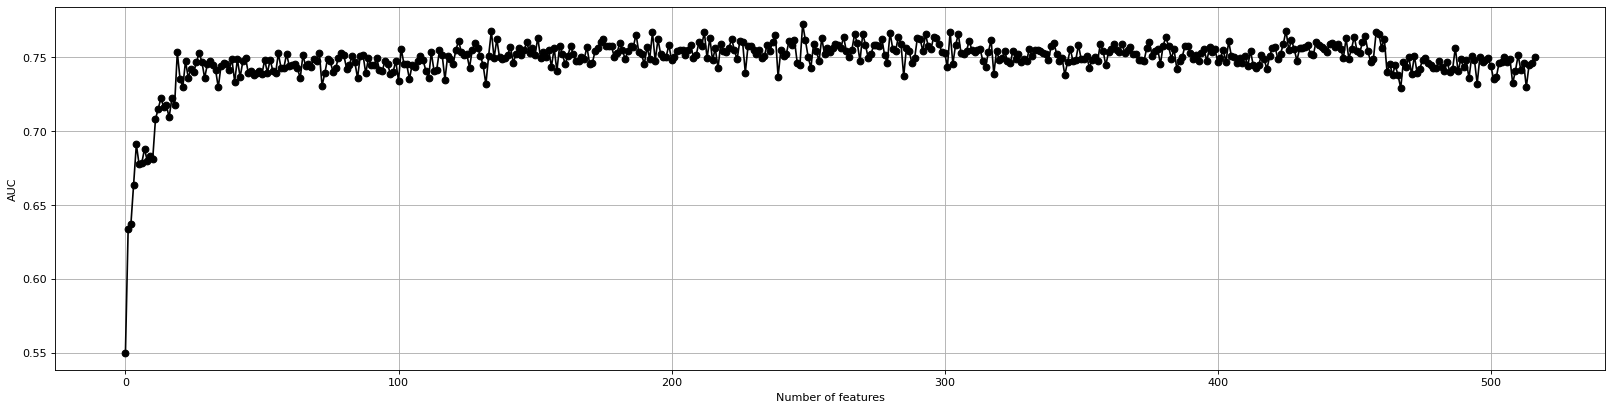

In [60]:
# Plotting the trend of the graph 
figure(figsize=(25, 6), dpi=80)

plt.plot(range(len(iter_evaluation_res_svm['auc'])), iter_evaluation_res_svm['auc'], '-ok')
plt.xlabel('Number of features')
plt.ylabel('AUC')

plt.grid()

plt.show()

#### Extracting the most important features

In [61]:
# Recalling the above function to obtain the most important features for the RF classifier
only_best_feat_svm, X_best_feat_svm = extract_most_imp_feat(lisbon_coimbra_df, 
                                                            iter_evaluation_res_svm, 
                                                            list(feat_imp_mean_ranks_svm['Feat_importance']))

only_best_feat_svm[:10]

The maximum value of AUC obtained with this result is: 0.7725238095238096
The number of features needed to obtain this result is: 249 

Dataset of 126 examples and 249 features 



,TRFE_HUMAN,TTHY_HUMAN,HPT_HUMAN,CO3_HUMAN,AACT_HUMAN,CLUS_HUMAN,GELS_HUMAN,IGG1_HUMAN,KLK6_HUMAN,VTDB_HUMAN,...,C1QA_HUMAN,TSP4_HUMAN,VGF_HUMAN,MFAP4_HUMAN,IGL1_HUMAN,SERC_HUMAN,KCC2B_HUMAN,FHR1_HUMAN,LTBP2_HUMAN,DPP2_HUMAN
0,0.064232,0.015572,0.002349,0.012248,0.009657,0.020666,0.004589,0.019001,0.001444,0.004702,...,0.000077,0.000408,0.000121,0.000152,0.001190,0.000005,0.000063,0.000030,0.000077,0.000305
1,0.047139,0.011901,0.018233,0.018902,0.010961,0.011661,0.003733,0.039033,0.001404,0.007228,...,0.000149,0.000640,0.000158,0.000032,0.002001,0.000026,0.000002,0.000020,0.000061,0.000197
2,0.029375,0.019694,0.002124,0.012882,0.014102,0.012147,0.004179,0.018865,0.001719,0.005895,...,0.000087,0.000019,0.000066,0.000120,0.000154,0.000026,0.000004,0.000040,0.000000,0.000180
3,0.071905,0.013097,0.021938,0.018822,0.017497,0.012758,0.004719,0.032280,0.001696,0.008149,...,0.000151,0.000354,0.000068,0.000045,0.000181,0.000035,0.000030,0.000020,0.000738,0.000234
4,0.064845,0.018108,0.002297,0.014416,0.011546,0.022392,0.005013,0.032797,0.001895,0.006314,...,0.000039,0.000018,0.000179,0.000038,0.000437,0.000011,0.000016,0.000057,0.000571,0.000106
5,0.099774,0.019711,0.001717,0.015407,0.011104,0.025068,0.007331,0.036365,0.002215,0.007469,...,0.000150,0.000553,0.000151,0.000032,0.000372,0.000048,0.000002,0.000033,0.000065,0.000267
6,0.062658,0.018951,0.009942,0.022950,0.019078,0.014764,0.006135,0.034719,0.001544,0.010749,...,0.000148,0.000026,0.000236,0.000019,0.000602,0.000012,0.000006,0.000022,0.000427,0.000350
7,0.050341,0.022560,0.005424,0.017594,0.014064,0.026162,0.008178,0.026875,0.002235,0.004789,...,0.000104,0.000017,0.000101,0.000144,0.000172,0.000055,0.000003,0.000074,0.000017,0.000265
8,0.031451,0.012957,0.001247,0.012776,0.010962,0.015613,0.004399,0.036856,0.001588,0.004911,...,0.000075,0.000019,0.000143,0.000123,0.000235,0.000010,0.000002,0.000023,0.000069,0.000145
9,0.053369,0.017765,0.006932,0.010877,0.009324,0.015607,0.003982,0.030383,0.002638,0.004409,...,0.000124,0.000034,0.000087,0.000037,0.000734,0.000007,0.000001,0.000012,0.000562,0.000239


#### Retraining the model with just the best important features

In [62]:
svm_result_best_feat = cv_iteration_1(svm_model, X_best_feat_svm, y, iterations=10, folds=10)

In [63]:
print('Performances of the models without the use of SMOTE:')
svm_result_best_feat

Performances of the models without the use of SMOTE:


,auc,accuracy,f1,precision,recall
0,0.763143,0.768718,0.797036,0.753628,0.860952


### **- Naive Bayes - NB**

#### Training the model one at the time 

In [48]:
n_iter = 10
n_folds = 10

# Adding one feature at the time
iter_evaluation_res_nb = cv_one_feat_at_time(list(feat_imp_mean_ranks_nb['Feat_importance']), nb_model, lisbon_coimbra_df, X, y, n_iter=n_iter, n_folds=n_folds)

100%     NCAM1_HUMAN     The number of features is: 517


#### Plotting the result

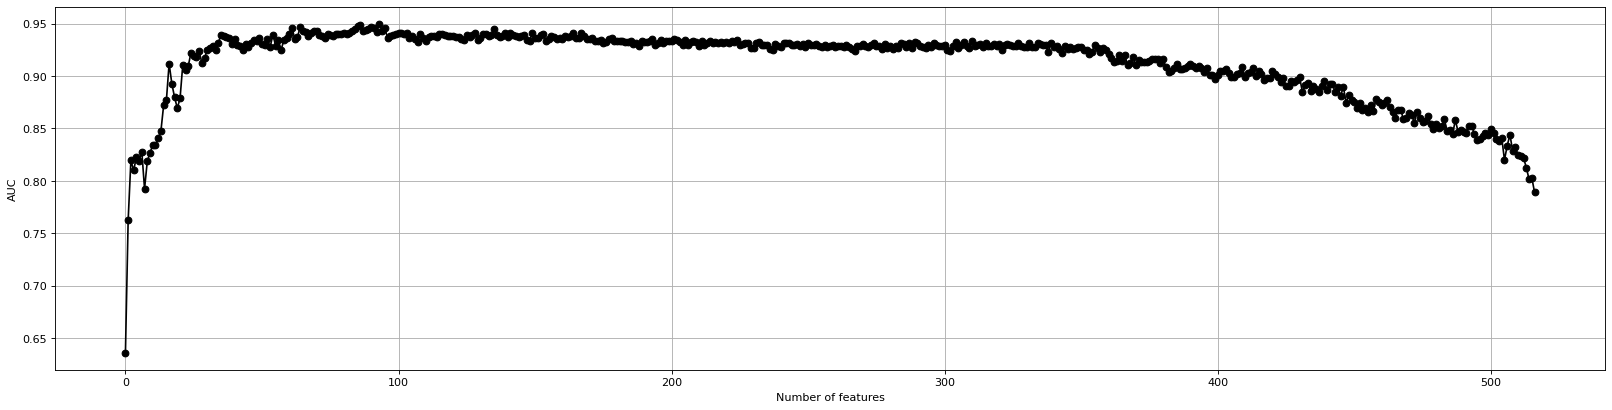

In [49]:
# Plotting the trend of the graph 
figure(figsize=(25, 6), dpi=80)

plt.plot(range(len(iter_evaluation_res_nb['auc'])), iter_evaluation_res_nb['auc'], '-ok')
plt.xlabel('Number of features')
plt.ylabel('AUC')

plt.grid()

plt.show()

#### Extracting the most important features

In [50]:
# Recalling the above function to obtain the most important features for the RF classifier
only_best_feat_nb, X_best_feat_nb = extract_most_imp_feat(lisbon_coimbra_df, 
                                                            iter_evaluation_res_nb, 
                                                            list(feat_imp_mean_ranks_nb['Feat_importance']))

only_best_feat_nb[:10]

The maximum value of AUC obtained with this result is: 0.9497857142857142
The number of features needed to obtain this result is: 94 

Dataset of 126 examples and 94 features 



,CBLN1_HUMAN,IBP7_HUMAN,COMP_HUMAN,1433G_HUMAN,NRP2_HUMAN,B2MG_HUMAN,APOB_HUMAN,TTHY_HUMAN,NRX1A_HUMAN,CO6A2_HUMAN,...,CALB1_HUMAN,FSTL5_HUMAN,TRFE_HUMAN,FUCO2_HUMAN,FGFR1_HUMAN,KLK6_HUMAN,LTBP1_HUMAN,PLTP_HUMAN,CNTFR_HUMAN,CD048_HUMAN
0,0.000038,0.000264,0.000093,0.000009,0.000268,0.000321,0.000598,0.015572,0.000504,0.000013,...,0.000039,0.000080,0.064232,0.000053,0.000011,0.001444,0.000041,0.001210,0.000092,0.000173
1,0.000046,0.000197,0.000117,0.000011,0.000172,0.000492,0.000238,0.011901,0.002695,0.000016,...,0.000080,0.000099,0.047139,0.000097,0.000010,0.001404,0.000052,0.000962,0.000032,0.000255
2,0.000075,0.000267,0.000108,0.000020,0.000227,0.000350,0.000684,0.019694,0.001527,0.000181,...,0.000008,0.000047,0.029375,0.000066,0.000026,0.001719,0.000044,0.000792,0.000048,0.000130
3,0.000084,0.000200,0.000133,0.000016,0.000203,0.000336,0.000184,0.013097,0.000455,0.000025,...,0.000105,0.000037,0.071905,0.000067,0.000015,0.001696,0.000010,0.001296,0.000028,0.000186
4,0.000148,0.000304,0.000125,0.000017,0.000306,0.000501,0.000176,0.018108,0.000458,0.000031,...,0.000030,0.000076,0.064845,0.000080,0.000036,0.001895,0.000017,0.001644,0.000063,0.000299
5,0.000153,0.000254,0.000183,0.000017,0.000286,0.000292,0.000205,0.019711,0.000647,0.000096,...,0.000080,0.000099,0.099774,0.000071,0.000022,0.002215,0.000061,0.001291,0.000018,0.000050
6,0.000059,0.000291,0.000078,0.000014,0.000186,0.000597,0.001104,0.018951,0.002783,0.000103,...,0.000028,0.000034,0.062658,0.000045,0.000020,0.001544,0.000022,0.001094,0.000055,0.000262
7,0.000069,0.000423,0.000097,0.000009,0.000412,0.000452,0.000284,0.022560,0.000657,0.000021,...,0.000048,0.000063,0.050341,0.000054,0.000024,0.002235,0.000009,0.001278,0.000061,0.000201
8,0.000033,0.000348,0.000035,0.000020,0.000263,0.000240,0.000329,0.012957,0.000412,0.000005,...,0.000067,0.000044,0.031451,0.000061,0.000019,0.001588,0.000013,0.001261,0.000080,0.000216
9,0.000030,0.000256,0.000083,0.000005,0.000110,0.000272,0.000745,0.017765,0.000873,0.000007,...,0.000197,0.000026,0.053369,0.000038,0.000044,0.002638,0.000011,0.001160,0.000039,0.000180


#### Retraining the model with just the best important features

In [51]:
nb_result_best_feat = cv_iteration_1(nb_model, X_best_feat_nb, y, iterations=10, folds=10)

In [52]:
print('Performances of the models without the use of SMOTE:')
nb_result_best_feat

Performances of the models without the use of SMOTE:


,auc,accuracy,f1,precision,recall
0,0.943952,0.944615,0.948595,0.946881,0.955238


### **- k Nearest Neighbors - kNN**

#### Training the model one at the time 

In [107]:
n_iter = 10
n_folds = 10

# Adding one feature at the time
iter_evaluation_res_knn = cv_one_feat_at_time(list(feat_imp_mean_ranks_knn['Feat_importance']), knn_model, lisbon_coimbra_df, X, y, n_iter=n_iter, n_folds=n_folds)

100%     PEDF_HUMAN     The number of features is: 517


#### Plotting the result

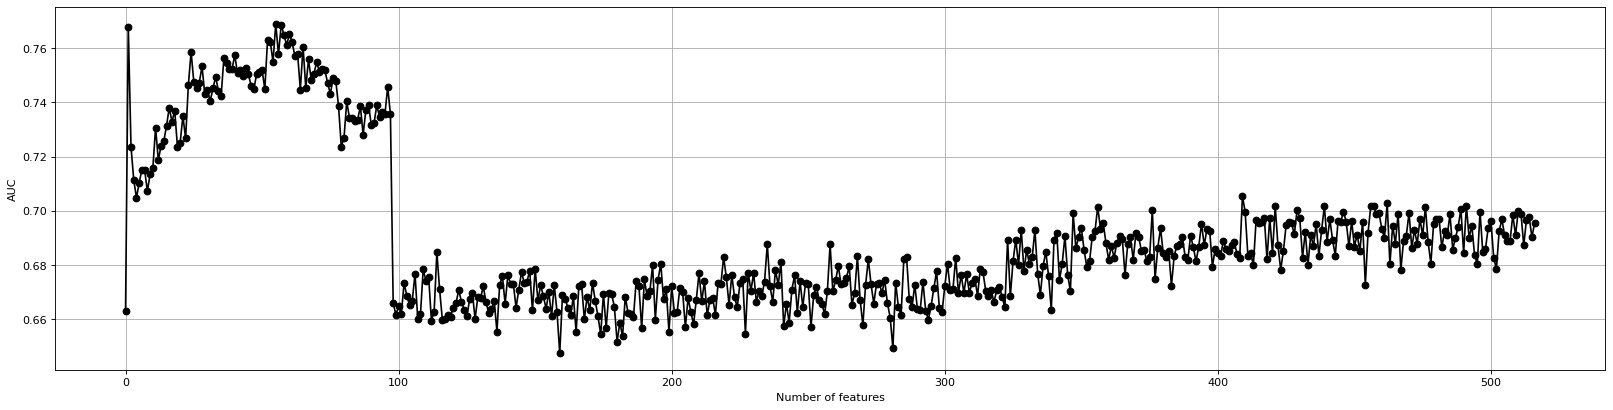

In [108]:
# Plotting the trend of the graph 
figure(figsize=(25, 6), dpi=80)

plt.plot(range(len(iter_evaluation_res_knn['auc'])), iter_evaluation_res_knn['auc'], '-ok')
plt.xlabel('Number of features')
plt.ylabel('AUC')

plt.grid()

plt.show()

#### Extracting the most important features

In [109]:
# Recalling the above function to obtain the most important features for the RF classifier
only_best_feat_knn, X_best_feat_knn = extract_most_imp_feat(lisbon_coimbra_df, 
                                                            iter_evaluation_res_knn, 
                                                            list(feat_imp_mean_ranks_knn['Feat_importance']))

only_best_feat_knn[:10]

The maximum value of AUC obtained with this result is: 0.7690238095238096
The number of features needed to obtain this result is: 56 

Dataset of 126 examples and 56 features 



,AACT_HUMAN,TTHY_HUMAN,CO3_HUMAN,TENX_HUMAN,CSPG4_HUMAN,AATM_HUMAN,FBLN2_HUMAN,NRX1A_HUMAN,FBLN5_HUMAN,HEXB_HUMAN,...,CBPB2_HUMAN,CO4A_HUMAN,LV321_HUMAN,RL24_HUMAN,CO1A1_HUMAN,A1BG_HUMAN,APOA1_HUMAN,SE6L1_HUMAN,NNRE_HUMAN,CBG_HUMAN
0,0.009657,0.015572,0.012248,0.000529,0.000005,0.000096,0.000500,0.000504,0.000106,0.000053,...,0.000135,0.000952,0.000133,0.000040,0.000516,0.001931,0.003949,0.000359,8.329777e-07,0.000677
1,0.010961,0.011901,0.018902,0.000311,0.000010,0.000053,0.000234,0.002695,0.000191,0.000150,...,0.000219,0.000769,0.000106,0.000012,0.000688,0.005400,0.008794,0.000275,1.026528e-05,0.000871
2,0.014102,0.019694,0.012882,0.000197,0.000008,0.000081,0.000438,0.001527,0.000151,0.000097,...,0.000239,0.000481,0.000035,0.000034,0.000302,0.003237,0.004362,0.000137,1.045972e-05,0.001220
3,0.017497,0.013097,0.018822,0.000334,0.000011,0.000041,0.000075,0.000455,0.000063,0.000145,...,0.000132,0.000817,0.000448,0.000064,0.000234,0.003453,0.008399,0.000217,1.298820e-05,0.001349
4,0.011546,0.018108,0.014416,0.000583,0.000004,0.000041,0.000302,0.000458,0.000089,0.000193,...,0.000239,0.000603,0.000101,0.000020,0.000310,0.003899,0.007418,0.000330,8.059993e-06,0.000725
5,0.011104,0.019711,0.015407,0.000565,0.000011,0.000025,0.000204,0.000647,0.000197,0.000148,...,0.000164,0.000753,0.000233,0.000033,0.000306,0.002747,0.008759,0.000516,1.264811e-06,0.000849
6,0.019078,0.018951,0.022950,0.000621,0.000007,0.000144,0.000235,0.002783,0.000086,0.000192,...,0.000330,0.000780,0.000076,0.000092,0.000338,0.006843,0.008959,0.000351,1.374003e-05,0.000844
7,0.014064,0.022560,0.017594,0.000555,0.000006,0.000732,0.000675,0.000657,0.000142,0.000200,...,0.000210,0.001424,0.000077,0.000064,0.000363,0.004252,0.005730,0.000254,5.267562e-06,0.000713
8,0.010962,0.012957,0.012776,0.000273,0.000003,0.000054,0.000422,0.000412,0.000062,0.000042,...,0.000224,0.000521,0.000287,0.000064,0.000567,0.004219,0.006505,0.000134,1.064725e-05,0.001104
9,0.009324,0.017765,0.010877,0.000870,0.000004,0.000022,0.000582,0.000873,0.000110,0.000191,...,0.000135,0.000760,0.000023,0.000040,0.000354,0.002543,0.003723,0.000182,5.902947e-06,0.000615


#### Retraining the model with just the best important features

In [110]:
knn_result_best_feat = cv_iteration_1(knn_model, X_best_feat_knn, y, iterations=10, folds=10) 

In [111]:
print('Performances of the models without the use of SMOTE:')
knn_result_best_feat 

Performances of the models without the use of SMOTE:


,auc,accuracy,f1,precision,recall
0,0.762548,0.772051,0.813582,0.743966,0.914762


### **- Decision Tree - DT**

#### Training the model one at the time 

In [53]:
n_iter = 10
n_folds = 10

# Adding one feature at the time
iter_evaluation_res_dt = cv_one_feat_at_time(list(feat_imp_mean_ranks_dt['Feat_importance']), dt_model, lisbon_coimbra_df, X, y, n_iter=n_iter, n_folds=n_folds)

100%     CADH6_HUMAN     The number of features is: 517


#### Plotting the result

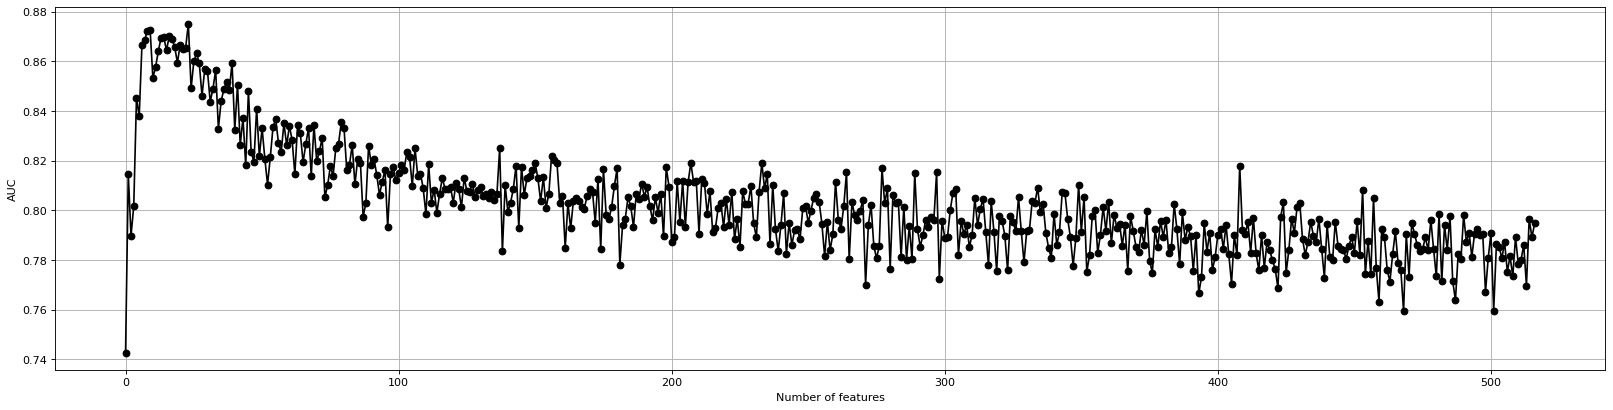

In [54]:
# Plotting the trend of the graph 
figure(figsize=(25, 6), dpi=80)

plt.plot(range(len(iter_evaluation_res_dt['auc'])), iter_evaluation_res_dt['auc'], '-ok')
plt.xlabel('Number of features')
plt.ylabel('AUC')

plt.grid()

plt.show()

#### Extracting the most important features

In [55]:
# Recalling the above function to obtain the most important features for the RF classifier
only_best_feat_dt, X_best_feat_dt = extract_most_imp_feat(lisbon_coimbra_df, 
                                                            iter_evaluation_res_dt, 
                                                            list(feat_imp_mean_ranks_dt['Feat_importance']))

only_best_feat_dt[:10]

The maximum value of AUC obtained with this result is: 0.8750476190476192
The number of features needed to obtain this result is: 24 

Dataset of 126 examples and 24 features 



,FETUA_HUMAN,GLYLB_HUMAN,ANT3_HUMAN,AACT_HUMAN,B2MG_HUMAN,SCG1_HUMAN,NBL1_HUMAN,APOH_HUMAN,A2GL_HUMAN,HEMO_HUMAN,...,FINC_HUMAN,TTHY_HUMAN,ZA2G_HUMAN,PGS2_HUMAN,CO3_HUMAN,CHAD_HUMAN,C1QC_HUMAN,CNDP1_HUMAN,CH3L1_HUMAN,NRX1A_HUMAN
0,0.000662,0.000117,0.002049,0.009657,0.000321,0.000073,0.000050,0.001984,0.000277,0.011258,...,0.002982,0.015572,0.000575,0.000197,0.012248,0.000121,0.000587,0.004334,0.000824,0.000504
1,0.001744,0.000138,0.004020,0.010961,0.000492,0.000073,0.000029,0.002532,0.000438,0.017177,...,0.001582,0.011901,0.000979,0.000156,0.018902,0.000183,0.000330,0.002826,0.000638,0.002695
2,0.001038,0.000108,0.003290,0.014102,0.000350,0.000106,0.000026,0.001695,0.000666,0.013433,...,0.001655,0.019694,0.000850,0.000214,0.012882,0.000155,0.000304,0.004654,0.001120,0.001527
3,0.001076,0.000155,0.002907,0.017497,0.000336,0.000082,0.000035,0.001681,0.000693,0.021202,...,0.002036,0.013097,0.000535,0.000234,0.018822,0.000117,0.000443,0.004435,0.001598,0.000455
4,0.001366,0.000132,0.003140,0.011546,0.000501,0.000100,0.000052,0.002486,0.000388,0.014269,...,0.002868,0.018108,0.000795,0.000163,0.014416,0.000142,0.000561,0.005980,0.001758,0.000458
5,0.001770,0.000126,0.003874,0.011104,0.000292,0.000259,0.000070,0.002927,0.000505,0.018226,...,0.003849,0.019711,0.001467,0.000245,0.015407,0.000164,0.000461,0.008486,0.001739,0.000647
6,0.001675,0.000189,0.005040,0.019078,0.000597,0.000132,0.000044,0.003578,0.000882,0.022374,...,0.002703,0.018951,0.001623,0.000169,0.022950,0.000286,0.000402,0.004537,0.001869,0.002783
7,0.001130,0.000146,0.002798,0.014064,0.000452,0.000144,0.000066,0.003339,0.000657,0.021759,...,0.004181,0.022560,0.001036,0.000352,0.017594,0.000112,0.000811,0.007339,0.001048,0.000657
8,0.001280,0.000106,0.003350,0.010962,0.000240,0.000120,0.000047,0.002679,0.000646,0.017537,...,0.002497,0.012957,0.001201,0.000138,0.012776,0.000119,0.000301,0.006077,0.001455,0.000412
9,0.000645,0.000096,0.001757,0.009324,0.000272,0.000090,0.000060,0.002297,0.000464,0.010803,...,0.002815,0.017765,0.000436,0.000926,0.010877,0.000305,0.000540,0.006458,0.000939,0.000873


#### Retraining the model with just the best important features

In [62]:
dt_result_best_feat = cv_iteration_1(dt_model, X_best_feat_dt, y, iterations=10, folds=10)

In [63]:
print('Performances of the models without the use of SMOTE:')
dt_result_best_feat

Performances of the models without the use of SMOTE:


,auc,accuracy,f1,precision,recall
0,0.852595,0.853718,0.857984,0.871167,0.857857


### **- Random Forest - RF**

#### Training the model one at the time 

In [117]:
n_iter = 10
n_folds = 10

# Adding one feature at the time
iter_evaluation_res_rf = cv_one_feat_at_time(list(feat_imp_mean_ranks_rf['Feat_importance']), rf_model, lisbon_coimbra_df, X, y, n_iter=n_iter, n_folds=n_folds)

100%     NCAM2_HUMAN     The number of features is: 517


#### Plotting the result

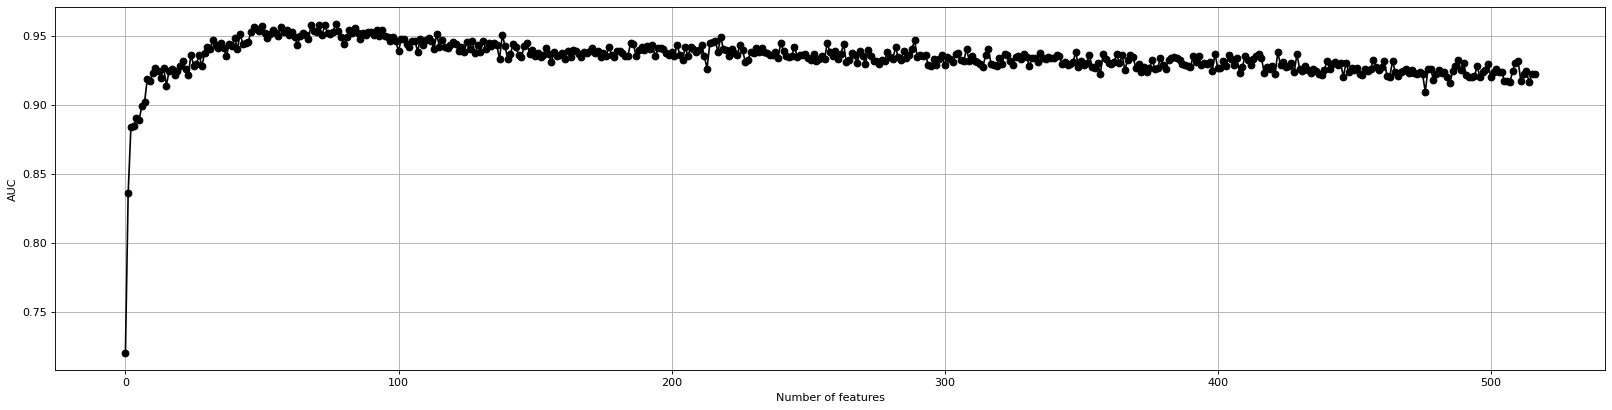

In [118]:
# Plotting the trend of the graph 
figure(figsize=(25, 6), dpi=80)

plt.plot(range(len(iter_evaluation_res_rf['auc'])), iter_evaluation_res_rf['auc'], '-ok')
plt.xlabel('Number of features')
plt.ylabel('AUC')

plt.grid()

plt.show()

#### Extracting the most important features

In [119]:
# Recalling the above function to obtain the most important features for the RF classifier
only_best_feat_rf, X_best_feat_rf = extract_most_imp_feat(lisbon_coimbra_df, 
                                                            iter_evaluation_res_rf, 
                                                            list(feat_imp_mean_ranks_rf['Feat_importance']))

only_best_feat_rf[:10]

The maximum value of AUC obtained with this result is: 0.9585238095238096
The number of features needed to obtain this result is: 78 

Dataset of 126 examples and 78 features 



,FBLN2_HUMAN,FETUA_HUMAN,IBP7_HUMAN,RET4_HUMAN,TTHY_HUMAN,APOA1_HUMAN,ANT3_HUMAN,NID2_HUMAN,NBL1_HUMAN,1433G_HUMAN,...,LAMA2_HUMAN,GLYLB_HUMAN,ECM1_HUMAN,HV118_HUMAN,SPRC_HUMAN,A2GL_HUMAN,CNTN4_HUMAN,MMP2_HUMAN,THBG_HUMAN,CBPB2_HUMAN
0,0.000500,0.000662,0.000264,0.000680,0.015572,0.003949,0.002049,0.000150,0.000050,0.000009,...,0.000281,0.000117,0.000469,0.000036,0.000091,0.000277,0.000084,0.000328,0.000439,0.000135
1,0.000234,0.001744,0.000197,0.001096,0.011901,0.008794,0.004020,0.000221,0.000029,0.000011,...,0.000299,0.000138,0.000477,0.000048,0.000117,0.000438,0.000053,0.000309,0.000566,0.000219
2,0.000438,0.001038,0.000267,0.000849,0.019694,0.004362,0.003290,0.000556,0.000026,0.000020,...,0.000370,0.000108,0.000309,0.000054,0.000097,0.000666,0.000062,0.000343,0.000721,0.000239
3,0.000075,0.001076,0.000200,0.000953,0.013097,0.008399,0.002907,0.000354,0.000035,0.000016,...,0.000249,0.000155,0.000442,0.000043,0.000083,0.000693,0.000092,0.000321,0.000757,0.000132
4,0.000302,0.001366,0.000304,0.001423,0.018108,0.007418,0.003140,0.000524,0.000052,0.000017,...,0.000299,0.000132,0.000814,0.000075,0.000135,0.000388,0.000389,0.000503,0.000715,0.000239
5,0.000204,0.001770,0.000254,0.001635,0.019711,0.008759,0.003874,0.000471,0.000070,0.000017,...,0.000430,0.000126,0.000798,0.000072,0.000126,0.000505,0.000108,0.000554,0.000820,0.000164
6,0.000235,0.001675,0.000291,0.001381,0.018951,0.008959,0.005040,0.000476,0.000044,0.000014,...,0.000365,0.000189,0.000479,0.000080,0.000095,0.000882,0.000081,0.000448,0.001069,0.000330
7,0.000675,0.001130,0.000423,0.001313,0.022560,0.005730,0.002798,0.000467,0.000066,0.000009,...,0.000187,0.000146,0.000442,0.000023,0.000083,0.000657,0.000418,0.000587,0.000707,0.000210
8,0.000422,0.001280,0.000348,0.000714,0.012957,0.006505,0.003350,0.000336,0.000047,0.000020,...,0.000370,0.000106,0.000506,0.000078,0.000131,0.000646,0.000070,0.000383,0.000764,0.000224
9,0.000582,0.000645,0.000256,0.000504,0.017765,0.003723,0.001757,0.000406,0.000060,0.000005,...,0.000337,0.000096,0.000612,0.000024,0.000077,0.000464,0.000048,0.000463,0.000499,0.000135


#### Retraining the model with just the best important features

In [120]:
rf_result_best_feat = cv_iteration_1(rf_model, X_best_feat_rf, y, iterations=10, folds=10)

In [121]:
print('Performances of the models without the use of SMOTE:')
rf_result_best_feat

Performances of the models without the use of SMOTE:


,auc,accuracy,f1,precision,recall
0,0.959857,0.960833,0.964742,0.950317,0.984048


### **- XGBoost - XGB**

#### Training the model one at the time 

In [122]:
n_iter = 10
n_folds = 10

# Adding one feature at the time
iter_evaluation_res_xgb = cv_one_feat_at_time(list(feat_imp_mean_ranks_xgb['Feat_importance']), xgb_model, lisbon_coimbra_df, X, y, n_iter=n_iter, n_folds=n_folds)

100%     CSTN3_HUMAN     The number of features is: 517


#### Plotting the result

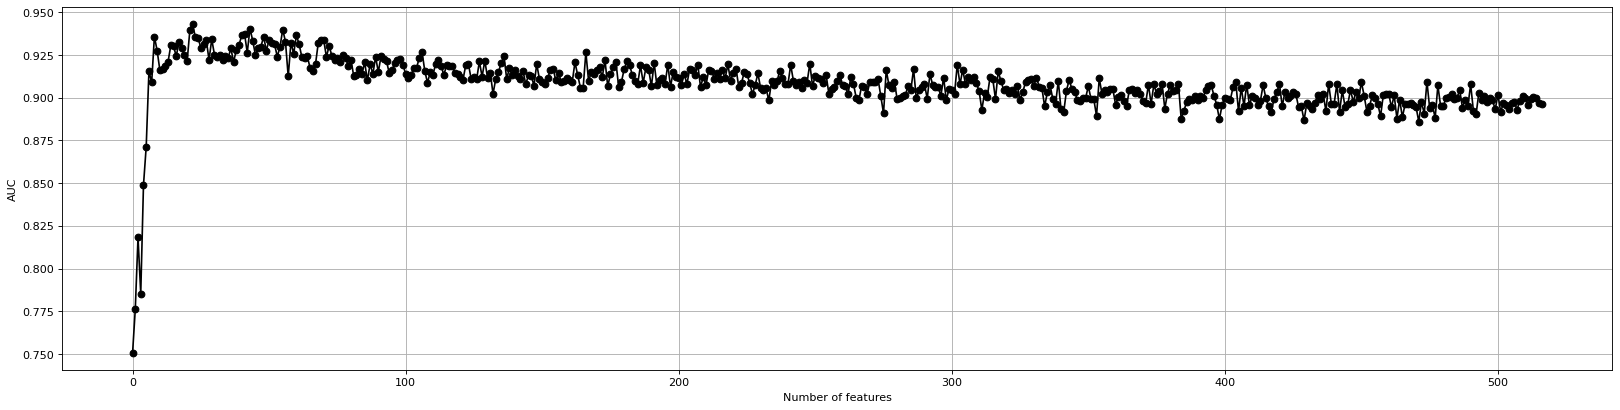

In [123]:
# Plotting the trend of the graph 
figure(figsize=(25, 6), dpi=80)

plt.plot(range(len(iter_evaluation_res_xgb['auc'])), iter_evaluation_res_xgb['auc'], '-ok')
plt.xlabel('Number of features')
plt.ylabel('AUC')

plt.grid()

plt.show()

#### Extracting the most important features

In [124]:
# Recalling the above function to obtain the most important features for the RF classifier
only_best_feat_xgb, X_best_feat_xgb = extract_most_imp_feat(lisbon_coimbra_df, 
                                                            iter_evaluation_res_xgb, 
                                                            list(feat_imp_mean_ranks_xgb['Feat_importance']))

only_best_feat_xgb[:10]

The maximum value of AUC obtained with this result is: 0.9432142857142857
The number of features needed to obtain this result is: 23 

Dataset of 126 examples and 23 features 



,FETUA_HUMAN,1433G_HUMAN,FINC_HUMAN,ZA2G_HUMAN,PGS2_HUMAN,CAH1_HUMAN,NBL1_HUMAN,CFAI_HUMAN,GLYLB_HUMAN,APOA1_HUMAN,...,DCC_HUMAN,C1S_HUMAN,A2AP_HUMAN,TTHY_HUMAN,CFAB_HUMAN,CALB1_HUMAN,ANT3_HUMAN,PLMN_HUMAN,PLTP_HUMAN,FIBG_HUMAN
0,0.000662,0.000009,0.002982,0.000575,0.000197,0.000091,0.000050,0.000862,0.000117,0.003949,...,0.000156,0.001900,0.000655,0.015572,0.002609,0.000039,0.002049,0.001469,0.001210,0.001620
1,0.001744,0.000011,0.001582,0.000979,0.000156,0.000170,0.000029,0.000306,0.000138,0.008794,...,0.000176,0.001146,0.000950,0.011901,0.003482,0.000080,0.004020,0.001968,0.000962,0.003605
2,0.001038,0.000020,0.001655,0.000850,0.000214,0.000178,0.000026,0.000321,0.000108,0.004362,...,0.000120,0.001507,0.000848,0.019694,0.003341,0.000008,0.003290,0.000902,0.000792,0.001940
3,0.001076,0.000016,0.002036,0.000535,0.000234,0.000069,0.000035,0.000368,0.000155,0.008399,...,0.000500,0.001479,0.001033,0.013097,0.005729,0.000105,0.002907,0.002559,0.001296,0.006678
4,0.001366,0.000017,0.002868,0.000795,0.000163,0.000082,0.000052,0.000338,0.000132,0.007418,...,0.000117,0.002136,0.000825,0.018108,0.003593,0.000030,0.003140,0.001344,0.001644,0.004151
5,0.001770,0.000017,0.003849,0.001467,0.000245,0.000174,0.000070,0.000341,0.000126,0.008759,...,0.000106,0.002341,0.001279,0.019711,0.004081,0.000080,0.003874,0.002210,0.001291,0.003251
6,0.001675,0.000014,0.002703,0.001623,0.000169,0.000134,0.000044,0.001125,0.000189,0.008959,...,0.000135,0.001991,0.001590,0.018951,0.004549,0.000028,0.005040,0.003609,0.001094,0.003215
7,0.001130,0.000009,0.004181,0.001036,0.000352,0.000088,0.000066,0.000377,0.000146,0.005730,...,0.000172,0.003533,0.000914,0.022560,0.002485,0.000048,0.002798,0.002122,0.001278,0.004759
8,0.001280,0.000020,0.002497,0.001201,0.000138,0.000027,0.000047,0.000310,0.000106,0.006505,...,0.000462,0.001520,0.000752,0.012957,0.003569,0.000067,0.003350,0.002571,0.001261,0.002531
9,0.000645,0.000005,0.002815,0.000436,0.000926,0.000543,0.000060,0.000247,0.000096,0.003723,...,0.000143,0.001921,0.000982,0.017765,0.002716,0.000197,0.001757,0.001705,0.001160,0.001839


#### Retraining the model with just the best important features

In [125]:
xgb_result_best_feat = cv_iteration_1(xgb_model, X_best_feat_xgb, y, iterations=10, folds=10)

In [126]:
print('Performances of the models without the use of SMOTE:')
xgb_result_best_feat

Performances of the models without the use of SMOTE:


,auc,accuracy,f1,precision,recall
0,0.931881,0.931795,0.934733,0.946111,0.931429


# Aggregating all the ranks and train the models


### ***Defining the function that I will use***

In [127]:
def cv_one_feat_at_time(feature_importance_name, model, Dataset, X, y, n_iter=10, n_folds=10):

    # Generating the X_iter matrix that will contain the features added one at the time each iteration
    X_iter = [[] for i in range(len(X))]

    # Defining the final structure that will contain the results of the iterations
    final_score_iterations = {}

    # looping between the features and adding the feature to the X_iter every time
    for j, feature in enumerate(feature_importance_name):

        clear_output(wait=True)
        print(f'{((j/len(feature_importance_name))*100):.0f}%', end='     ')
        print(feature, end='     ')
        
        # print(feature)
        # Building the X_iter 
        for i, feat in enumerate(list(Dataset[feature])):
            X_iter[i].append(feat)
        
        print(f'The number of features is: {len(X_iter[0])}')

        result_iter = {}

        for _ in range(n_iter):
            results = cross_validate_balancing(model, np.array([np.array(xi) for xi in X_iter]), y, balance='None', folds=n_folds) # balance='None' -> If you don't want SMOTE
            results = {k: np.mean(v) for k, v in results.items()}

            for key, value in results.items():
                if key in result_iter.keys(): 
                    result_iter[key].append(value)
                else:
                    result_iter[key] = [value]

        result_iter = {k: np.mean(v) for k, v in result_iter.items()}

        for key, value in result_iter.items():
            if key in final_score_iterations.keys():
                final_score_iterations[key].append(value)
            else:
                final_score_iterations[key] = [value]

    return final_score_iterations

In [128]:
def extract_most_imp_feat(Dataset, final_iteration_results, features_importance_name):
    # Finding the maximum value of AUC
    maximum = max(final_iteration_results['auc'])
    print(f'The maximum value of AUC obtained with this result is: {maximum}')

    # The number of features needed to obtain this maximum value of AUC
    pos = final_iteration_results['auc'].index(maximum) + 1
    print(f'The number of features needed to obtain this result is: {pos} \n')

    # Storing these best important features
    best_features = features_importance_name[:pos]
    # print(f'These features are: \n{best_features} \n')
    

    # Generating a new Dataset in which there will be only the best important features for the model
    lisbon_coimbra_important_features = pd.DataFrame()

    for feature in best_features:
        lisbon_coimbra_important_features[feature] = list(Dataset[feature])

    print(f'Dataset of {lisbon_coimbra_important_features.shape[0]} examples and {lisbon_coimbra_important_features.shape[1]} features \n')

    # Converting the Dataframe in a numpy array, that will be our X set:
    X_best_feat = lisbon_coimbra_important_features.values

    assert len(X_best_feat[0]) == lisbon_coimbra_important_features.shape[1]

    return lisbon_coimbra_important_features, X_best_feat

In [129]:
def cross_validate_balancing_1(estimator, X, y, balance = SMOTE(), folds=10):

    cv = StratifiedKFold(n_splits = folds, shuffle = True) 
    scores = {\
            'auc':[], \
            'accuracy': [], \
            'f1': [], \
            'precision': [], \
            'recall': []}
    
    for train_idx, test_idx in cv.split(X,y): 
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        if balance != 'None':
            X_train, y_train = balance.fit_resample(X_train, y_train)

        estimator.fit(X_train, y_train)
        y_predicted = estimator.predict(X_test)

        scores['auc'].append(roc_auc_score(y_test, y_predicted))
        scores['accuracy'].append(accuracy_score(y_test, y_predicted))
        scores['f1'].append(f1_score(y_test, y_predicted))
        scores['precision'].append(precision_score(y_test, y_predicted))
        scores['recall'].append(recall_score(y_test, y_predicted))

    return scores

In [130]:
def cv_iteration_1(model, X, y, iterations=10, folds=10):
    
    # Defining the final dictionary that will contain the scores
    iter_result_no_smote = {}
    
    for _ in range(iterations):
        
        result_no_smote = cross_validate_balancing_1(model, X, y, balance='None', folds=folds) # Calling the CV function withOUT SMOTE
        result_no_smote = {k: np.mean(v) for k, v in result_no_smote.items()}

        # Filling the dictionary with the resuts obtained WITHOUT applying SMOTE
        for k, v in result_no_smote.items():
            if k in iter_result_no_smote.keys():
                iter_result_no_smote[k].append(v)
            else:
                iter_result_no_smote[k] = [v]
                
    iter_result_no_smote = {k: np.mean(v) for k, v in iter_result_no_smote.items()}

    iter_result_no_smote_df = pd.DataFrame(iter_result_no_smote, index=[0])

    return iter_result_no_smote_df

### ***Aggregating all the rankings***

In [66]:
models_feat_imp_dict = [feat_imp_univ, feat_imp_svm, feat_imp_nb, feat_imp_knn, feat_imp_dt, feat_imp_rf, feat_imp_xgb, feat_imp_lr]

all_models_feat_imp = {}

for model in models_feat_imp_dict:
    for key, value in model.items():
        if key not in all_models_feat_imp.keys():
            all_models_feat_imp[key] = value
        else:
            old_list = all_models_feat_imp[key]
            new_list = old_list + value
            all_models_feat_imp[key] = new_list
    
all_models_feat_imp_mean = {k: np.mean(v) for k, v in all_models_feat_imp.items()}
all_models_feat_imp_sorted = dict(sorted(all_models_feat_imp_mean.items(), key=lambda x: x[1]))
sorted_mean_pos_df = pd.DataFrame(list(all_models_feat_imp_sorted.items()), columns=['Feat_importance', 'Pos_mean'])
sorted_mean_pos_df[:10]

,Feat_importance,Pos_mean
0,TTHY_HUMAN,71.791667
1,FETUA_HUMAN,83.208333
2,AACT_HUMAN,95.833333
3,FBLN2_HUMAN,108.416667
4,ANT3_HUMAN,109.500000
5,APOA1_HUMAN,110.666667
6,CO3_HUMAN,111.875000
7,IBP7_HUMAN,121.125000
8,1433G_HUMAN,121.833333
9,TRFE_HUMAN,123.291667


### **- Support Vector Machine - SVM**

#### Training the model one at the time 

In [132]:
n_iter = 10
n_folds = 10

# Adding one feature at the time
tot_iter_evaluation_res_svm = cv_one_feat_at_time(list(sorted_mean_pos_df['Feat_importance']), svm_model, lisbon_coimbra_df, X, y, n_iter=n_iter, n_folds=n_folds)

100%     SNED1_HUMAN     The number of features is: 517


#### Plotting the result

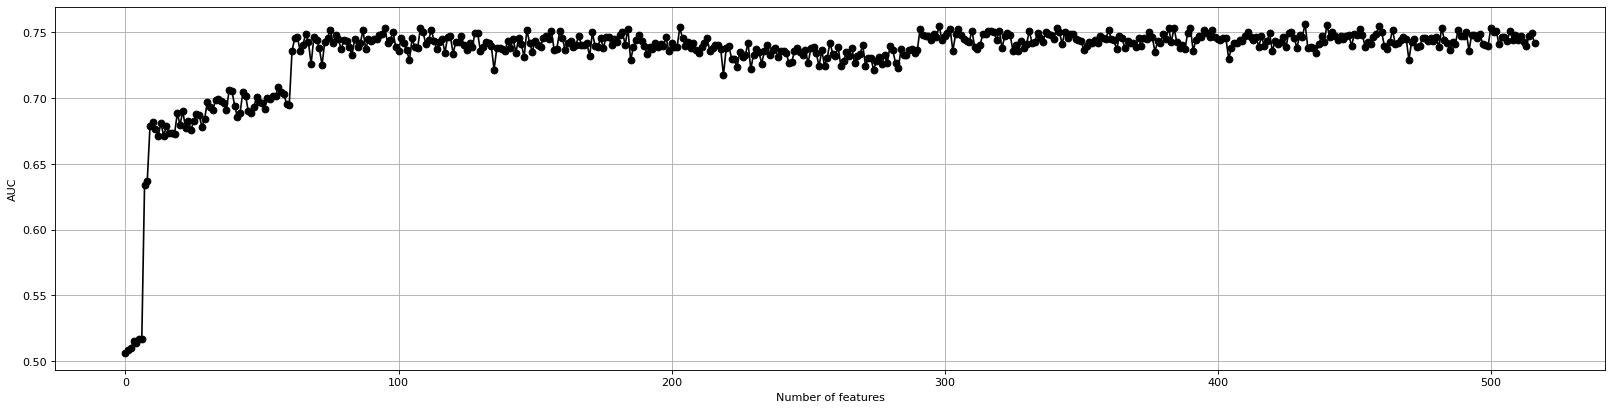

In [133]:
# Plotting the trend of the graph 
figure(figsize=(25, 6), dpi=80)

plt.plot(range(len(tot_iter_evaluation_res_svm['auc'])), tot_iter_evaluation_res_svm['auc'], '-ok')
plt.xlabel('Number of features')
plt.ylabel('AUC')

plt.grid()

plt.show()

#### Extracting the most important features

In [134]:
# Recalling the above function to obtain the most important features for the RF classifier
only_best_feat_svm_tot, X_best_feat_svm_tot = extract_most_imp_feat(lisbon_coimbra_df, 
                                                                    tot_iter_evaluation_res_svm, 
                                                                    list(sorted_mean_pos_df['Feat_importance']))

only_best_feat_svm_tot[:10]

The maximum value of AUC obtained with this result is: 0.7564761904761904
The number of features needed to obtain this result is: 433 

Dataset of 126 examples and 433 features 



,TTHY_HUMAN,FETUA_HUMAN,AACT_HUMAN,1433G_HUMAN,NRX1A_HUMAN,FBLN2_HUMAN,ANT3_HUMAN,TRFE_HUMAN,APOA1_HUMAN,CO3_HUMAN,...,KV37_HUMAN,CBPQ_HUMAN,SE6L2_HUMAN,MANBA_HUMAN,HBB_HUMAN,IGHM_HUMAN,IGD_HUMAN,COFA1_HUMAN,GRIA4_HUMAN,APOC1_HUMAN
0,0.015572,0.000662,0.009657,0.000009,0.000504,0.000500,0.002049,0.064232,0.003949,0.012248,...,0.000007,0.000163,0.000261,0.000391,0.000368,0.000389,0.000041,0.000008,0.000044,0.000487
1,0.011901,0.001744,0.010961,0.000011,0.002695,0.000234,0.004020,0.047139,0.008794,0.018902,...,0.000017,0.000095,0.000148,0.000263,0.000261,0.000389,0.000091,0.000003,0.000018,0.000481
2,0.019694,0.001038,0.014102,0.000020,0.001527,0.000438,0.003290,0.029375,0.004362,0.012882,...,0.000005,0.000204,0.000180,0.000296,0.000291,0.000666,0.000039,0.000009,0.000033,0.000378
3,0.013097,0.001076,0.017497,0.000016,0.000455,0.000075,0.002907,0.071905,0.008399,0.018822,...,0.000010,0.000100,0.000080,0.000528,0.000305,0.000728,0.000066,0.000006,0.000032,0.000300
4,0.018108,0.001366,0.011546,0.000017,0.000458,0.000302,0.003140,0.064845,0.007418,0.014416,...,0.000017,0.000268,0.000181,0.000367,0.000242,0.000449,0.000080,0.000008,0.000055,0.000476
5,0.019711,0.001770,0.011104,0.000017,0.000647,0.000204,0.003874,0.099774,0.008759,0.015407,...,0.000014,0.000246,0.000264,0.000263,0.000356,0.000623,0.000165,0.000013,0.000084,0.000127
6,0.018951,0.001675,0.019078,0.000014,0.002783,0.000235,0.005040,0.062658,0.008959,0.022950,...,0.000025,0.000241,0.000227,0.000628,0.001233,0.000218,0.000215,0.000011,0.000049,0.000693
7,0.022560,0.001130,0.014064,0.000009,0.000657,0.000675,0.002798,0.050341,0.005730,0.017594,...,0.000008,0.000255,0.000244,0.000259,0.000187,0.000676,0.000058,0.000001,0.000072,0.000114
8,0.012957,0.001280,0.010962,0.000020,0.000412,0.000422,0.003350,0.031451,0.006505,0.012776,...,0.000008,0.000211,0.000142,0.000471,0.000257,0.000356,0.000080,0.000007,0.000042,0.000150
9,0.017765,0.000645,0.009324,0.000005,0.000873,0.000582,0.001757,0.053369,0.003723,0.010877,...,0.000006,0.000240,0.000181,0.000982,0.000214,0.000223,0.000085,0.000006,0.000016,0.000123


#### Retraining the model with just the best important features

In [135]:
svm_result_best_feat_tot = cv_iteration_1(svm_model, X_best_feat_svm_tot, y, iterations=10, folds=10)

In [136]:
print('Performances of the models without the use of SMOTE:')
svm_result_best_feat_tot

Performances of the models without the use of SMOTE:


,auc,accuracy,f1,precision,recall
0,0.745786,0.750577,0.777024,0.747547,0.826905


### **- Naive Bayes - NB**

#### Training the model one at the time 

In [137]:
n_iter = 10
n_folds = 10

# Adding one feature at the time
tot_iter_evaluation_res_nb = cv_one_feat_at_time(list(sorted_mean_pos_df['Feat_importance']), nb_model, lisbon_coimbra_df, X, y, n_iter=n_iter, n_folds=n_folds)

100%     SNED1_HUMAN     The number of features is: 517


#### Plotting the result

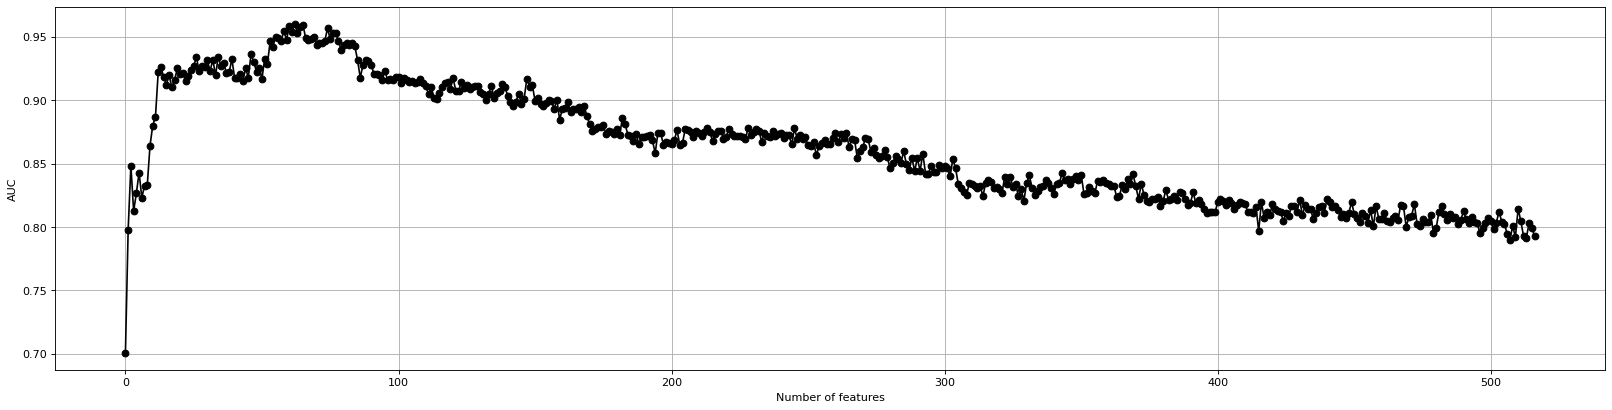

In [138]:
# Plotting the trend of the graph 
figure(figsize=(25, 6), dpi=80)

plt.plot(range(len(tot_iter_evaluation_res_nb['auc'])), tot_iter_evaluation_res_nb['auc'], '-ok')
plt.xlabel('Number of features')
plt.ylabel('AUC')

plt.grid()

plt.show()

#### Extracting the most important features

In [139]:
# Recalling the above function to obtain the most important features for the RF classifier
only_best_feat_nb_tot, X_best_feat_nb_tot = extract_most_imp_feat(lisbon_coimbra_df, 
                                                                    tot_iter_evaluation_res_nb, 
                                                                    list(sorted_mean_pos_df['Feat_importance']))

only_best_feat_nb_tot[:10]

The maximum value of AUC obtained with this result is: 0.9600714285714285
The number of features needed to obtain this result is: 63 

Dataset of 126 examples and 63 features 



,TTHY_HUMAN,FETUA_HUMAN,AACT_HUMAN,1433G_HUMAN,NRX1A_HUMAN,FBLN2_HUMAN,ANT3_HUMAN,TRFE_HUMAN,APOA1_HUMAN,CO3_HUMAN,...,DPP6_HUMAN,HV434_HUMAN,KV224_HUMAN,CBG_HUMAN,KV230_HUMAN,SCG1_HUMAN,A2AP_HUMAN,ENPP2_HUMAN,ALBU_HUMAN,CH3L1_HUMAN
0,0.015572,0.000662,0.009657,0.000009,0.000504,0.000500,0.002049,0.064232,0.003949,0.012248,...,0.000052,0.000081,0.000340,0.000677,0.000141,0.000073,0.000655,0.002182,0.356318,0.000824
1,0.011901,0.001744,0.010961,0.000011,0.002695,0.000234,0.004020,0.047139,0.008794,0.018902,...,0.000128,0.000112,0.000104,0.000871,0.000128,0.000073,0.000950,0.001410,0.386206,0.000638
2,0.019694,0.001038,0.014102,0.000020,0.001527,0.000438,0.003290,0.029375,0.004362,0.012882,...,0.000123,0.000048,0.000070,0.001220,0.000064,0.000106,0.000848,0.002493,0.487252,0.001120
3,0.013097,0.001076,0.017497,0.000016,0.000455,0.000075,0.002907,0.071905,0.008399,0.018822,...,0.000162,0.000184,0.000251,0.001349,0.000107,0.000082,0.001033,0.001267,0.349113,0.001598
4,0.018108,0.001366,0.011546,0.000017,0.000458,0.000302,0.003140,0.064845,0.007418,0.014416,...,0.000096,0.000202,0.000235,0.000725,0.000138,0.000100,0.000825,0.001442,0.326597,0.001758
5,0.019711,0.001770,0.011104,0.000017,0.000647,0.000204,0.003874,0.099774,0.008759,0.015407,...,0.000055,0.000178,0.000202,0.000849,0.000287,0.000259,0.001279,0.001472,0.262566,0.001739
6,0.018951,0.001675,0.019078,0.000014,0.002783,0.000235,0.005040,0.062658,0.008959,0.022950,...,0.000109,0.000191,0.000237,0.000844,0.000154,0.000132,0.001590,0.001524,0.282660,0.001869
7,0.022560,0.001130,0.014064,0.000009,0.000657,0.000675,0.002798,0.050341,0.005730,0.017594,...,0.000070,0.000053,0.000094,0.000713,0.000047,0.000144,0.000914,0.001948,0.289263,0.001048
8,0.012957,0.001280,0.010962,0.000020,0.000412,0.000422,0.003350,0.031451,0.006505,0.012776,...,0.000054,0.000142,0.000177,0.001104,0.000169,0.000120,0.000752,0.001572,0.479895,0.001455
9,0.017765,0.000645,0.009324,0.000005,0.000873,0.000582,0.001757,0.053369,0.003723,0.010877,...,0.000046,0.000135,0.000097,0.000615,0.000115,0.000090,0.000982,0.001745,0.436040,0.000939


#### Retraining the model with just the best important features

In [140]:
nb_result_best_feat_tot = cv_iteration_1(nb_model, X_best_feat_nb_tot, y, iterations=10, folds=10)

In [141]:
print('Performances of the models without the use of SMOTE:')
nb_result_best_feat_tot

Performances of the models without the use of SMOTE:


,auc,accuracy,f1,precision,recall
0,0.955881,0.957372,0.960891,0.955714,0.969762


### **- k Nearest Neighbors - kNN**

#### Training the model one at the time 

In [142]:
n_iter = 10
n_folds = 10

# Adding one feature at the time
tot_iter_evaluation_res_knn = cv_one_feat_at_time(list(sorted_mean_pos_df['Feat_importance']), knn_model, lisbon_coimbra_df, X, y, n_iter=n_iter, n_folds=n_folds)

100%     SNED1_HUMAN     The number of features is: 517


#### Plotting the result

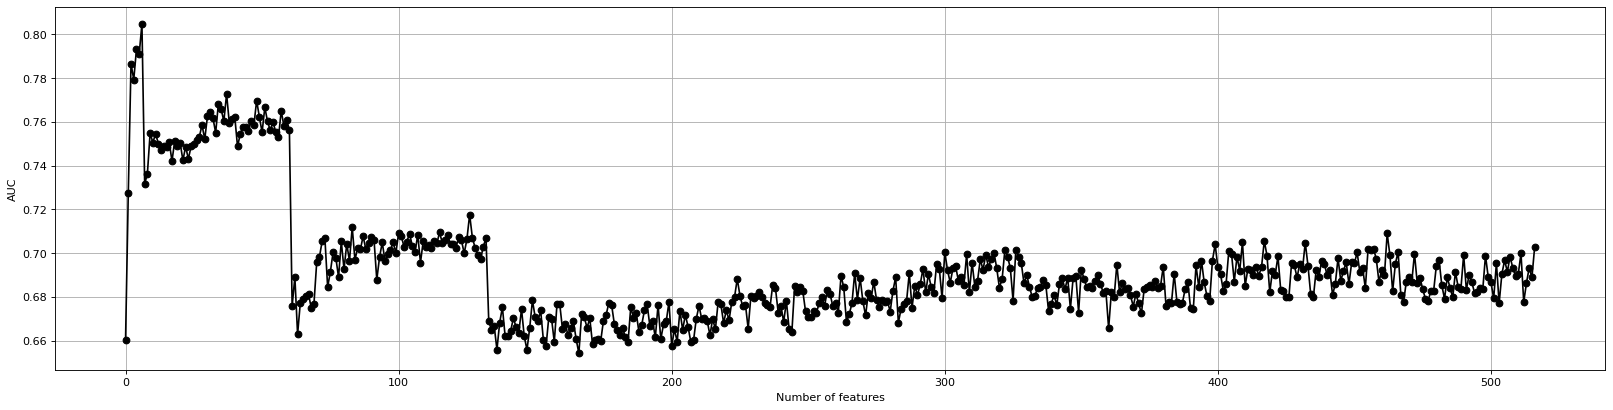

In [143]:
# Plotting the trend of the graph 
figure(figsize=(25, 6), dpi=80)

plt.plot(range(len(tot_iter_evaluation_res_knn['auc'])), tot_iter_evaluation_res_knn['auc'], '-ok')
plt.xlabel('Number of features')
plt.ylabel('AUC')

plt.grid()

plt.show()

#### Extracting the most important features

In [144]:
# Recalling the above function to obtain the most important features for the RF classifier
only_best_feat_knn_tot, X_best_feat_knn_tot = extract_most_imp_feat(lisbon_coimbra_df, 
                                                                    tot_iter_evaluation_res_knn, 
                                                                    list(sorted_mean_pos_df['Feat_importance']))

only_best_feat_knn_tot[:10]

The maximum value of AUC obtained with this result is: 0.8047619047619048
The number of features needed to obtain this result is: 7 

Dataset of 126 examples and 7 features 



,TTHY_HUMAN,FETUA_HUMAN,AACT_HUMAN,1433G_HUMAN,NRX1A_HUMAN,FBLN2_HUMAN,ANT3_HUMAN
0,0.015572,0.000662,0.009657,0.000009,0.000504,0.000500,0.002049
1,0.011901,0.001744,0.010961,0.000011,0.002695,0.000234,0.004020
2,0.019694,0.001038,0.014102,0.000020,0.001527,0.000438,0.003290
3,0.013097,0.001076,0.017497,0.000016,0.000455,0.000075,0.002907
4,0.018108,0.001366,0.011546,0.000017,0.000458,0.000302,0.003140
5,0.019711,0.001770,0.011104,0.000017,0.000647,0.000204,0.003874
6,0.018951,0.001675,0.019078,0.000014,0.002783,0.000235,0.005040
7,0.022560,0.001130,0.014064,0.000009,0.000657,0.000675,0.002798
8,0.012957,0.001280,0.010962,0.000020,0.000412,0.000422,0.003350
9,0.017765,0.000645,0.009324,0.000005,0.000873,0.000582,0.001757


#### Retraining the model with just the best important features

In [145]:
knn_result_best_feat_tot = cv_iteration_1(knn_model, X_best_feat_knn_tot, y, iterations=10, folds=10)

In [146]:
print('Performances of the models without the use of SMOTE:')
knn_result_best_feat_tot

Performances of the models without the use of SMOTE:


,auc,accuracy,f1,precision,recall
0,0.803762,0.811218,0.838518,0.785391,0.917857


### **- Decision Tree - DT**

#### Training the model one at the time 

In [147]:
n_iter = 10
n_folds = 10

# Adding one feature at the time
tot_iter_evaluation_res_dt = cv_one_feat_at_time(list(sorted_mean_pos_df['Feat_importance']), dt_model, lisbon_coimbra_df, X, y, n_iter=n_iter, n_folds=n_folds)

100%     SNED1_HUMAN     The number of features is: 517


#### Plotting the result

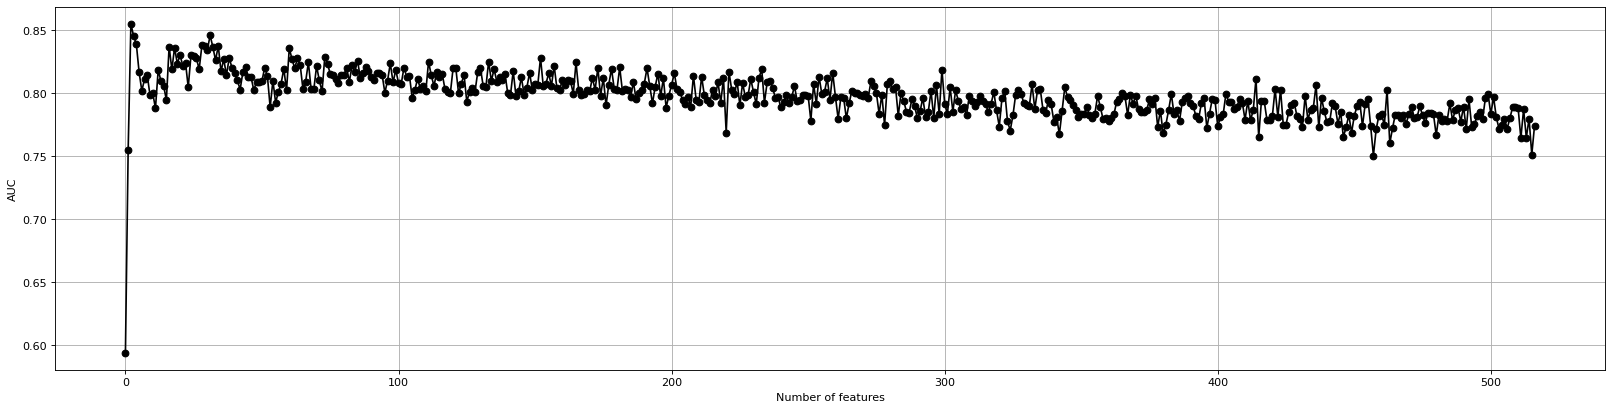

In [148]:
# Plotting the trend of the graph 
figure(figsize=(25, 6), dpi=80)

plt.plot(range(len(tot_iter_evaluation_res_dt['auc'])), tot_iter_evaluation_res_dt['auc'], '-ok')
plt.xlabel('Number of features')
plt.ylabel('AUC')

plt.grid()

plt.show()

#### Extracting the most important features

In [149]:
# Recalling the above function to obtain the most important features for the RF classifier
only_best_feat_dt_tot, X_best_feat_dt_tot = extract_most_imp_feat(lisbon_coimbra_df, 
                                                                    tot_iter_evaluation_res_dt, 
                                                                    list(sorted_mean_pos_df['Feat_importance']))

only_best_feat_dt_tot[:10]

The maximum value of AUC obtained with this result is: 0.8548333333333332
The number of features needed to obtain this result is: 3 

Dataset of 126 examples and 3 features 



,TTHY_HUMAN,FETUA_HUMAN,AACT_HUMAN
0,0.015572,0.000662,0.009657
1,0.011901,0.001744,0.010961
2,0.019694,0.001038,0.014102
3,0.013097,0.001076,0.017497
4,0.018108,0.001366,0.011546
5,0.019711,0.001770,0.011104
6,0.018951,0.001675,0.019078
7,0.022560,0.001130,0.014064
8,0.012957,0.001280,0.010962
9,0.017765,0.000645,0.009324


#### Retraining the model with just the best important features

In [150]:
dt_result_best_feat_tot = cv_iteration_1(dt_model, X_best_feat_dt_tot, y, iterations=10, folds=10)

In [151]:
print('Performances of the models without the use of SMOTE:')
dt_result_best_feat_tot

Performances of the models without the use of SMOTE:


,auc,accuracy,f1,precision,recall
0,0.862976,0.864551,0.873275,0.875984,0.885952


### **- Random Forest - RF**

#### Training the model one at the time 

In [152]:
n_iter = 10
n_folds = 10

# Adding one feature at the time
tot_iter_evaluation_res_rf = cv_one_feat_at_time(list(sorted_mean_pos_df['Feat_importance']), rf_model, lisbon_coimbra_df, X, y, n_iter=n_iter, n_folds=n_folds)

100%     SNED1_HUMAN     The number of features is: 517


#### Plotting the result

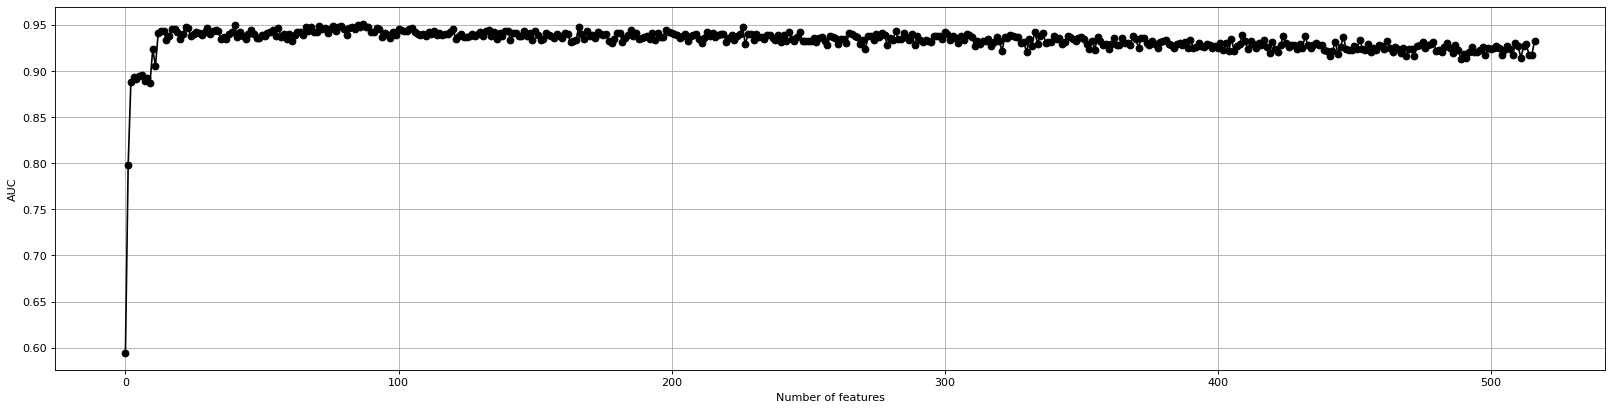

In [153]:
# Plotting the trend of the graph 
figure(figsize=(25, 6), dpi=80)

plt.plot(range(len(tot_iter_evaluation_res_rf['auc'])), tot_iter_evaluation_res_rf['auc'], '-ok')
plt.xlabel('Number of features')
plt.ylabel('AUC')

plt.grid()

plt.show()

#### Extracting the most important features

In [154]:
# Recalling the above function to obtain the most important features for the RF classifier
only_best_feat_rf_tot, X_best_feat_rf_tot = extract_most_imp_feat(lisbon_coimbra_df, 
                                                                    tot_iter_evaluation_res_rf, 
                                                                    list(sorted_mean_pos_df['Feat_importance']))

only_best_feat_rf_tot[:10]

The maximum value of AUC obtained with this result is: 0.951
The number of features needed to obtain this result is: 88 

Dataset of 126 examples and 88 features 



,TTHY_HUMAN,FETUA_HUMAN,AACT_HUMAN,1433G_HUMAN,NRX1A_HUMAN,FBLN2_HUMAN,ANT3_HUMAN,TRFE_HUMAN,APOA1_HUMAN,CO3_HUMAN,...,ITIH4_HUMAN,KV127_HUMAN,FBLN3_HUMAN,CBLN4_HUMAN,EFNB3_HUMAN,CLC11_HUMAN,CHRD_HUMAN,SPB6_HUMAN,AFAM_HUMAN,APOL1_HUMAN
0,0.015572,0.000662,0.009657,0.000009,0.000504,0.000500,0.002049,0.064232,0.003949,0.012248,...,0.001140,0.000003,0.002903,0.000011,0.000055,0.000075,0.000003,0.000075,0.001116,0.000012
1,0.011901,0.001744,0.010961,0.000011,0.002695,0.000234,0.004020,0.047139,0.008794,0.018902,...,0.002201,0.000019,0.001353,0.000007,0.000035,0.000222,0.000006,0.000068,0.001824,0.000033
2,0.019694,0.001038,0.014102,0.000020,0.001527,0.000438,0.003290,0.029375,0.004362,0.012882,...,0.001425,0.000023,0.002138,0.000046,0.000032,0.000170,0.000008,0.000095,0.000968,0.000005
3,0.013097,0.001076,0.017497,0.000016,0.000455,0.000075,0.002907,0.071905,0.008399,0.018822,...,0.001751,0.000014,0.001774,0.000015,0.000051,0.000426,0.000002,0.000082,0.001218,0.000034
4,0.018108,0.001366,0.011546,0.000017,0.000458,0.000302,0.003140,0.064845,0.007418,0.014416,...,0.001559,0.000032,0.002694,0.000029,0.000054,0.000324,0.000005,0.000140,0.001336,0.000030
5,0.019711,0.001770,0.011104,0.000017,0.000647,0.000204,0.003874,0.099774,0.008759,0.015407,...,0.001488,0.000016,0.002387,0.000008,0.000042,0.000383,0.000039,0.000168,0.001395,0.000024
6,0.018951,0.001675,0.019078,0.000014,0.002783,0.000235,0.005040,0.062658,0.008959,0.022950,...,0.002341,0.000032,0.001862,0.000020,0.000015,0.000257,0.000009,0.000197,0.001254,0.000038
7,0.022560,0.001130,0.014064,0.000009,0.000657,0.000675,0.002798,0.050341,0.005730,0.017594,...,0.002271,0.000015,0.002909,0.000021,0.000111,0.000099,0.000007,0.000118,0.000842,0.000005
8,0.012957,0.001280,0.010962,0.000020,0.000412,0.000422,0.003350,0.031451,0.006505,0.012776,...,0.001654,0.000021,0.002089,0.000021,0.000046,0.000221,0.000001,0.000052,0.000926,0.000012
9,0.017765,0.000645,0.009324,0.000005,0.000873,0.000582,0.001757,0.053369,0.003723,0.010877,...,0.000953,0.000013,0.003029,0.000018,0.000053,0.000197,0.000011,0.000096,0.000743,0.000024


#### Retraining the model with just the best important features

In [155]:
rf_result_best_feat_tot = cv_iteration_1(rf_model, X_best_feat_rf_tot, y, iterations=10, folds=10)

In [156]:
print('Performances of the models without the use of SMOTE:')
rf_result_best_feat_tot

Performances of the models without the use of SMOTE:


,auc,accuracy,f1,precision,recall
0,0.944167,0.94609,0.950925,0.934345,0.973333


### **- XGBoost - XGB**

#### Training the model one at the time 

In [157]:
n_iter = 10
n_folds = 10

# Adding one feature at the time
tot_iter_evaluation_res_xgb = cv_one_feat_at_time(list(sorted_mean_pos_df['Feat_importance']), xgb_model, lisbon_coimbra_df, X, y, n_iter=n_iter, n_folds=n_folds)

100%     SNED1_HUMAN     The number of features is: 517


#### Plotting the result

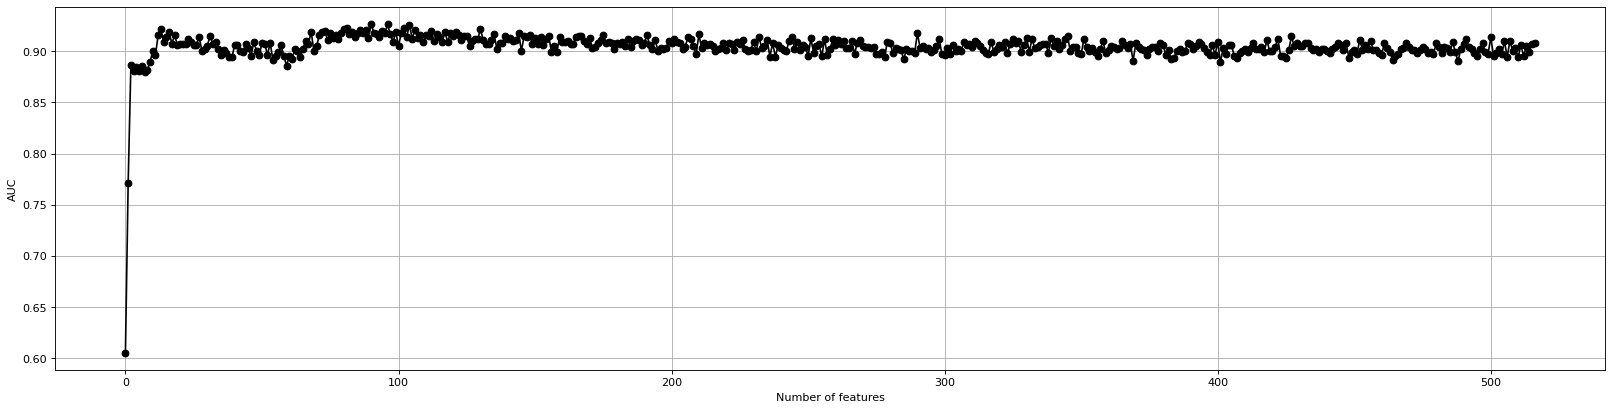

In [158]:
# Plotting the trend of the graph 
figure(figsize=(25, 6), dpi=80)

plt.plot(range(len(tot_iter_evaluation_res_xgb['auc'])), tot_iter_evaluation_res_xgb['auc'], '-ok')
plt.xlabel('Number of features')
plt.ylabel('AUC')

plt.grid()

plt.show()

#### Extracting the most important features

In [159]:
# Recalling the above function to obtain the most important features for the RF classifier
only_best_feat_xgb_tot, X_best_feat_xgb_tot = extract_most_imp_feat(lisbon_coimbra_df, 
                                                                    tot_iter_evaluation_res_xgb, 
                                                                    list(sorted_mean_pos_df['Feat_importance']))

only_best_feat_xgb_tot[:10]

The maximum value of AUC obtained with this result is: 0.9268333333333334
The number of features needed to obtain this result is: 91 

Dataset of 126 examples and 91 features 



,TTHY_HUMAN,FETUA_HUMAN,AACT_HUMAN,1433G_HUMAN,NRX1A_HUMAN,FBLN2_HUMAN,ANT3_HUMAN,TRFE_HUMAN,APOA1_HUMAN,CO3_HUMAN,...,CBLN4_HUMAN,EFNB3_HUMAN,CLC11_HUMAN,CHRD_HUMAN,SPB6_HUMAN,AFAM_HUMAN,APOL1_HUMAN,PTPRS_HUMAN,THBG_HUMAN,SORL_HUMAN
0,0.015572,0.000662,0.009657,0.000009,0.000504,0.000500,0.002049,0.064232,0.003949,0.012248,...,0.000011,0.000055,0.000075,0.000003,0.000075,0.001116,0.000012,0.000112,0.000439,0.000192
1,0.011901,0.001744,0.010961,0.000011,0.002695,0.000234,0.004020,0.047139,0.008794,0.018902,...,0.000007,0.000035,0.000222,0.000006,0.000068,0.001824,0.000033,0.000116,0.000566,0.000166
2,0.019694,0.001038,0.014102,0.000020,0.001527,0.000438,0.003290,0.029375,0.004362,0.012882,...,0.000046,0.000032,0.000170,0.000008,0.000095,0.000968,0.000005,0.000171,0.000721,0.000346
3,0.013097,0.001076,0.017497,0.000016,0.000455,0.000075,0.002907,0.071905,0.008399,0.018822,...,0.000015,0.000051,0.000426,0.000002,0.000082,0.001218,0.000034,0.000154,0.000757,0.000211
4,0.018108,0.001366,0.011546,0.000017,0.000458,0.000302,0.003140,0.064845,0.007418,0.014416,...,0.000029,0.000054,0.000324,0.000005,0.000140,0.001336,0.000030,0.000190,0.000715,0.000293
5,0.019711,0.001770,0.011104,0.000017,0.000647,0.000204,0.003874,0.099774,0.008759,0.015407,...,0.000008,0.000042,0.000383,0.000039,0.000168,0.001395,0.000024,0.000183,0.000820,0.000249
6,0.018951,0.001675,0.019078,0.000014,0.002783,0.000235,0.005040,0.062658,0.008959,0.022950,...,0.000020,0.000015,0.000257,0.000009,0.000197,0.001254,0.000038,0.000206,0.001069,0.000343
7,0.022560,0.001130,0.014064,0.000009,0.000657,0.000675,0.002798,0.050341,0.005730,0.017594,...,0.000021,0.000111,0.000099,0.000007,0.000118,0.000842,0.000005,0.000204,0.000707,0.000228
8,0.012957,0.001280,0.010962,0.000020,0.000412,0.000422,0.003350,0.031451,0.006505,0.012776,...,0.000021,0.000046,0.000221,0.000001,0.000052,0.000926,0.000012,0.000167,0.000764,0.000319
9,0.017765,0.000645,0.009324,0.000005,0.000873,0.000582,0.001757,0.053369,0.003723,0.010877,...,0.000018,0.000053,0.000197,0.000011,0.000096,0.000743,0.000024,0.000137,0.000499,0.000216


#### Retraining the model with just the best important features

In [160]:
xgb_result_best_feat_tot = cv_iteration_1(xgb_model, X_best_feat_xgb_tot, y, iterations=10, folds=10)

In [161]:
print('Performances of the models without the use of SMOTE:')
xgb_result_best_feat_tot

Performances of the models without the use of SMOTE:


,auc,accuracy,f1,precision,recall
0,0.923571,0.924359,0.929037,0.932028,0.93381


# **Ensemble**

### Developing the ensamble method with these ML Classifiers:
- SVM 
- Naive Bayes 
- kNN 
- Decision Tree 

In [162]:
# Generating the data-structure that will contain the models and the dataframe with only the best features for each of the model
model_features_dict = {}

# Storing the models and the dataframe that we have retrieved above
model_features_dict = {'SVM': (svm_model, only_best_feat_svm),
                        'NB': (nb_model, only_best_feat_nb),
                        'kNN': (knn_model, only_best_feat_knn),
                        'DT': (dt_model, only_best_feat_dt)}

### ***Defining the function that I will use***

In [163]:
def cross_validation_ensemble(model_dataset_dict, X, y, folds=10):
    
    cv = StratifiedKFold(n_splits=folds, shuffle=True)
    
    scores = {\
                'auc':[], \
                'accuracy': [], \
                'f1': [], \
                'precision': [], \
                'recall': []}
    
    for train_idx, test_idx in cv.split(X,y): 
    
        ensemble_pred = []
        y_pred_ensemble = list()
    
        for key, values in model_dataset_dict.items():

            # The X matrix will contain the best features for each of the model
            X_temp = values[1].values
    
            # Splitting the X matrix in train and test using the cv.split function (this spit will be the same for each of the model)
            X_train, X_test = X_temp[train_idx], X_temp[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]
    
            # Fitting the model
            values[0].fit(X_train, y_train)
            # Predictig the class of the X_test dataset
            y_pred = values[0].predict(X_test)
    
            # Storing the y_pred result in the ensemble pred array
            if len(ensemble_pred) == 0:
                ensemble_pred = [[x] for x in y_pred]
            else:
                for idx, el in enumerate(y_pred):
                    ensemble_pred[idx].append(el)
    
        # Extracting the class that has been majority voted from the different models
        for idx, li in enumerate(ensemble_pred):
            pred = li[0]
            count = 0
            for el in li:
                freq_el = li.count(el)
                if freq_el > count:
                    count = freq_el
                    pred = el
            y_pred_ensemble.append(pred)
    
        # Computing the scoring metrics
        scores['auc'].append(roc_auc_score(list(y_test), y_pred_ensemble))
        scores['accuracy'].append(accuracy_score(list(y_test), y_pred_ensemble))
        scores['f1'].append(f1_score(list(y_test), y_pred_ensemble))
        scores['precision'].append(precision_score(list(y_test), y_pred_ensemble))
        scores['recall'].append(recall_score(list(y_test), y_pred_ensemble))
    
    # Computing the mean of the k-fold-CV for each of the scoring metrics f
    scores = {k: np.mean(v) for k, v in scores.items()}

    return scores

### ***Obtaining the results from the ensemble classifier***

In [164]:
ensemble_result = cross_validation_ensemble(model_features_dict, X, y, folds=10)

In [165]:
# Printing the result of the ensemble
print(f'The result of the ensemble constituted by SVM, NB, kNN and DT models is:')
for k, v in ensemble_result.items():
    print(f'{k} : {v}')

The result of the ensemble constituted by SVM, NB, kNN and DT models is:
auc : 0.7697619047619046
accuracy : 0.7769230769230769
f1 : 0.8126490339725635
precision : 0.7447474747474747
recall : 0.9095238095238095


## **Putting together the result of this ensable with the RF and XGB ensemble**

In [166]:
# Generating the data-structure that will contain the ensemble models and the dataframe with only the best features for each of the model
ens_model_features_dict = {}

# Storing the models and the dataframe that we have retrieved above
ens_model_features_dict = {'RF': (rf_model, only_best_feat_rf),
                            'XGB': (nb_model, only_best_feat_xgb)}

### ***Defining the functions that I will use***

In [167]:
def ensemble_models(model_dataset_dict, train_idx, test_idx, y):

    ensemble_pred = []
    y_pred_ensemble = list()

    for key, values in model_dataset_dict.items():    
        
        # The X matrix will contain the best features for each of the model
        X_temp = values[1].values

        # Splitting the X matrix in train and test using the cv.split function (this spit will be the same for each of the model)
        X_train, X_test = X_temp[train_idx], X_temp[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Fitting the model
        values[0].fit(X_train, y_train)

        # Predictig the class of the X_test dataset
        y_pred = values[0].predict(X_test)

        # Storing the y_pred result in the ensemble pred array
        if len(ensemble_pred) == 0:
            ensemble_pred = [[x] for x in y_pred]
        else:
            for idx, el in enumerate(y_pred):
                ensemble_pred[idx].append(el)

    # Finding and saving the most voted class
    for idx, li in enumerate(ensemble_pred):
            pred = li[0]
            count = 0
            for el in li:
                freq_el = li.count(el)
                if freq_el > count:
                    count = freq_el
                    pred = el
            y_pred_ensemble.append(pred)
    
    return y_pred_ensemble

In [168]:
def cross_validation_ensemble_tot(model_dataset_dict, ensemble_dataset_dict, X, y, folds=10):

    cv = StratifiedKFold(n_splits=folds, shuffle=True)
    
    scores = {\
                'auc':[], \
                'accuracy': [], \
                'f1': [], \
                'precision': [], \
                'recall': []}
    
    for train_idx, test_idx in cv.split(X,y): 

        ensemble_pred = []
        y_pred_ensemble = list()

        y_ensemble = ensemble_models(model_dataset_dict, train_idx, test_idx, y)   

        for key, values in ensemble_dataset_dict.items():

            # The X matrix will contain the best features for each of the model
            X_temp = values[1].values
    
            # Splitting the X matrix in train and test using the cv.split function (this spit will be the same for each of the model)
            X_train, X_test = X_temp[train_idx], X_temp[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]
            
            # Fitting the model
            values[0].fit(X_train, y_train)

            # Predictig the class of the X_test dataset
            y_pred = values[0].predict(X_test)    

            # print(y_pred, 'len :', len(y_pred))  

            # Storing the y_pred result in the ensemble pred array
            if len(ensemble_pred) == 0:
                ensemble_pred = [[x] for x in y_pred]
            else:
                for idx, el in enumerate(y_pred):
                    ensemble_pred[idx].append(el)
        
        # Adding the results of the model ensemble
        for i, pred in enumerate(y_ensemble):
            ensemble_pred[i].append(pred)

        # Finding and saving the most voted class
        for idx, li in enumerate(ensemble_pred):
                pred = li[0]
                count = 0
                for el in li:
                    freq_el = li.count(el)
                    if freq_el > count:
                        count = freq_el
                        pred = el
                y_pred_ensemble.append(pred)

        scores['auc'].append(roc_auc_score(y_test, y_pred_ensemble))
        scores['accuracy'].append(accuracy_score(y_test, y_pred_ensemble))
        scores['f1'].append(f1_score(y_test, y_pred_ensemble))
        scores['precision'].append(precision_score(y_test, y_pred_ensemble))
        scores['recall'].append(recall_score(y_test, y_pred_ensemble))
    
    scores = {k: np.mean(v) for k, v in scores.items()}

    return scores

### ***Obtaining the results from the ensemble classifier***

In [169]:
esneble_result_tot = cross_validation_ensemble_tot(model_features_dict, ens_model_features_dict, X, y, folds=10)

In [170]:
print(f'The result of the ensemble constituted by all the models is:')
for k, v in esneble_result_tot.items():
    print(f'{k} : {v}')

The result of the ensemble constituted by all the models is:
auc : 0.944047619047619
accuracy : 0.9448717948717948
f1 : 0.9479054279054278
precision : 0.9464285714285715
recall : 0.9547619047619047


## **Ensemble with the best features from all the models**

# Storing all the variables and results 

In [108]:
dill.dump_session('Proteomic_517_ML_analysis_01_env.db')